## Southern Individual Pre Eruptions

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import cartopy.util as util
import matplotlib as mpl
from glob import glob
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
import scipy.stats as stats
import netCDF4 as nc4

mpl.rcParams['figure.figsize'] = [10,4]
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0
mpl.rcParams['xtick.labelsize']=16
mpl.rcParams['ytick.labelsize']=16

### Loading in Files

In [2]:
casePath='/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/'
caseName='b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002'

In [3]:
case = casePath + caseName + '.pop.h.' + 'TEMP.*' + '.nc' #sample one 0020-12.nc' 
data = xr.open_mfdataset(case)
data

<xarray.Dataset>
Dimensions:                 (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 12000, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time                    (time) object 0850-02-01 00:00:00 ... 1850-01-01 ...
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables:
    moc_components          (time, moc_comp) |S384 dask.array<chunksize=(600, 3), meta=np.ndarray>
    transport_components    (time, transport_comp) |S384 dask.array<chunksize=(600, 5), meta=np.ndarray>
    transport_regions       (time, transport_reg) |S384 dask.array<chunksize=(600, 2), meta=np.ndarray>
    dz                      (time, z_t) float32 dask.array<chunksize=(600, 60), meta=np.ndarray>
    dzw                     (time, z_w) float32 dask.array<chunksize=(600, 60), meta=np.ndarray>
    KMT                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    KMU                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    REGION_MASK             (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    UAREA                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    TAREA                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    HU                      (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    HT                      (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DXU                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DYU                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DXT                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DYT                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    HTN                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    HTE                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    HUS                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    HUW                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ANGLE                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ANGLET                  (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    days_in_norm_year       (time) timedelta64[ns] 365 days ... 365 days
    grav                    (time) float64 980.6 980.6 980.6 ... 980.6 980.6
    omega                   (time) float64 7.292e-05 7.292e-05 ... 7.292e-05
    radius                  (

In [4]:
def pop_add_cyclic(data,TLAT,TLONG): 
    nj = TLAT.shape[0] # size of POP grid
    ni = TLONG.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)
    tlon = TLONG
    tlat = TLAT
    tlon = np.where(np.greater_equal(tlon, min(tlon[:,0])), tlon-360., tlon) #make monotoncially increasing
    lon  = np.concatenate((tlon, tlon + 360.), 1) # concatenate to make larger array
    lon = lon[:, xL:xR] #restrict to middle rane
    if ni == 320: # this is the x1 POP grid
        lon[367:-3, 0] = lon[367:-3, 0] + 360.        
    lon = lon - 360.
    lon = np.hstack((lon, lon[:, 0:1] + 360.)) # add in cyclic point
    if ni == 320:
        lon[367:, -1] = lon[367:, -1] - 360.
    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:, 0] = lon[:, 0] - 1e-8
    #-- periodicity
    lat = np.concatenate((tlat, tlat), 1)
    lat = lat[:, xL:xR]
    lat = np.hstack((lat, lat[:,0:1]))
    lon_dim = 1 #ds[v].dims.index('nlon')
    field = data
    field = np.concatenate((field, field), 1)
    field = field[:, xL:xR]
    field = np.concatenate((field, field[:, 0:1]), lon_dim)
    
    return field, lat, lon

In [5]:
from scipy.ndimage import uniform_filter1d

def rolling_mean(a, W, axis=-1):
    # a : Input ndarray
    # W : Window size
    # axis : Axis along which we will apply rolling/sliding mean
    hW = W//2
    L = a.shape[axis]-W+1   
    indexer = [slice(None) for _ in range(a.ndim)]
    indexer[axis] = slice(hW,hW+L)
    return uniform_filter1d(a,W,axis=axis)[tuple(indexer)]

In [6]:
def ENSO_area_weighted_mean(var,TAREA):  
    # assumes 2D field as var input
    # make sure masking is correct, otherwise we get nans
    var = np.ma.masked_invalid(var)
    TAREA = np.ma.masked_invalid(TAREA) # I think this is necessary
    # resulting variable should have dimensions of depth and time (x)
    ave = np.zeros(var.shape[0])
    # loop over time
    for t in np.arange(var.shape[0]):
        ave[t] = np.ma.average(var[t,167:206,203:248],weights=TAREA[167:206,203:248])
    return ave

In [7]:
def Trop_area_weighted_mean(var,TAREA):  
    # assumes 2D field as var input
    # make sure masking is correct, otherwise we get nans
    var = np.ma.masked_invalid(var)
    TAREA = np.ma.masked_invalid(TAREA) # I think this is necessary
    # resulting variable should have dimensions of depth and time (x)
    ave = np.zeros(var.shape[0])
    # loop over time
    for t in np.arange(var.shape[0]):
        ave[t] = np.ma.average(var[t],weights=TAREA)
    return ave

In [8]:
casePath='/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/'
caseName='b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002'

In [9]:
case = casePath + caseName + '.pop.h.' + 'TEMP.*' + '.nc' #sample one 0020-12.nc' 
data = xr.open_mfdataset(case)
data

<xarray.Dataset>
Dimensions:                 (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 12000, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time                    (time) object 0850-02-01 00:00:00 ... 1850-01-01 ...
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables:
    moc_components          (time, moc_comp) |S384 dask.array<chunksize=(600, 3), meta=np.ndarray>
    transport_components    (time, transport_comp) |S384 dask.array<chunksize=(600, 5), meta=np.ndarray>
    transport_regions       (time, transport_reg) |S384 dask.array<chunksize=(600, 2), meta=np.ndarray>
    dz                      (time, z_t) float32 dask.array<chunksize=(600, 60), meta=np.ndarray>
    dzw                     (time, z_w) float32 dask.array<chunksize=(600, 60), meta=np.ndarray>
    KMT                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    KMU                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    REGION_MASK             (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    UAREA                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    TAREA                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    HU                      (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    HT                      (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DXU                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DYU                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DXT                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DYT                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    HTN                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    HTE                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    HUS                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    HUW                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ANGLE                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ANGLET                  (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    days_in_norm_year       (time) timedelta64[ns] 365 days ... 365 days
    grav                    (time) float64 980.6 980.6 980.6 ... 980.6 980.6
    omega                   (time) float64 7.292e-05 7.292e-05 ... 7.292e-05
    radius                  (

In [10]:
case

'/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.*.nc'

In [11]:
def pop_add_cyclic(data,TLAT,TLONG): 
    nj = TLAT.shape[0] # size of POP grid
    ni = TLONG.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)
    tlon = TLONG
    tlat = TLAT
    tlon = np.where(np.greater_equal(tlon, min(tlon[:,0])), tlon-360., tlon) #make monotoncially increasing
    lon  = np.concatenate((tlon, tlon + 360.), 1) # concatenate to make larger array
    lon = lon[:, xL:xR] #restrict to middle rane
    if ni == 320: # this is the x1 POP grid
        lon[367:-3, 0] = lon[367:-3, 0] + 360.        
    lon = lon - 360.
    lon = np.hstack((lon, lon[:, 0:1] + 360.)) # add in cyclic point
    if ni == 320:
        lon[367:, -1] = lon[367:, -1] - 360.
    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:, 0] = lon[:, 0] - 1e-8
    #-- periodicity
    lat = np.concatenate((tlat, tlat), 1)
    lat = lat[:, xL:xR]
    lat = np.hstack((lat, lat[:,0:1]))
    lon_dim = 1 #ds[v].dims.index('nlon')
    field = data
    field = np.concatenate((field, field), 1)
    field = field[:, xL:xR]
    field = np.concatenate((field, field[:, 0:1]), lon_dim)
    
    return field, lat, lon

In [12]:
from scipy.ndimage import uniform_filter1d

def rolling_mean(a, W, axis=-1):
    # a : Input ndarray
    # W : Window size
    # axis : Axis along which we will apply rolling/sliding mean
    hW = W//2
    L = a.shape[axis]-W+1   
    indexer = [slice(None) for _ in range(a.ndim)]
    indexer[axis] = slice(hW,hW+L)
    return uniform_filter1d(a,W,axis=axis)[tuple(indexer)]

In [13]:
def ENSO_area_weighted_mean(var,TAREA):  
    # assumes 2D field as var input
    # make sure masking is correct, otherwise we get nans
    var = np.ma.masked_invalid(var)
    TAREA = np.ma.masked_invalid(TAREA) # I think this is necessary
    # resulting variable should have dimensions of depth and time (x)
    ave = np.zeros(var.shape[0])
    # loop over time
    for t in np.arange(var.shape[0]):
        ave[t] = np.ma.average(var[t,167:206,203:248],weights=TAREA[167:206,203:248])
    return ave

In [14]:
def Trop_area_weighted_mean(var,TAREA):  
    # assumes 2D field as var input
    # make sure masking is correct, otherwise we get nans
    var = np.ma.masked_invalid(var)
    TAREA = np.ma.masked_invalid(TAREA) # I think this is necessary
    # resulting variable should have dimensions of depth and time (x)
    ave = np.zeros(var.shape[0])
    # loop over time
    for t in np.arange(var.shape[0]):
        ave[t] = np.ma.average(var[t],weights=TAREA)
    return ave

### Get the lat and lon locations for the El Nino region: 

In [15]:
data['TLAT'][206,50].values

array(5.18019218)

In [16]:
data['TLAT'][167,50].values

array(-5.2090898)

In [17]:
abs(data['TLONG'][50,203].values-360)

171.06249474233516

In [18]:
abs(data['TLONG'][50,248].values-360)

120.43749333356618

### Pulling SST and monthly

In [19]:
data = data.TEMP[:,0,:,:]
data

<xarray.DataArray 'TEMP' (time: 12000, nlat: 384, nlon: 320)>
dask.array<getitem, shape=(12000, 384, 320), dtype=float32, chunksize=(600, 384, 320), chunktype=numpy.ndarray>
Coordinates:
    z_t      float32 500.0
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time     (time) object 0850-02-01 00:00:00 ... 1850-01-01 00:00:00
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Potential Temperature
    units:         degC
    grid_loc:      3111
    cell_methods:  time: mean

In [20]:
monthlydata=data.sel(time=slice('1000-01-01 00:00:00','1030-12-31 00:00:00')).groupby('time.month').mean(dim='time')

### Southern Volcanoes

Chronological Order

In [21]:
unident1 = data.sel(time=slice('0854-11-01 00:00:00','0855-11-01 00:00:00')).groupby('time.month').mean(dim='time')
unident2 = data.sel(time=slice('0870-02-01 00:00:00','0871-02-01 00:00:00')).groupby('time.month').mean(dim='time')
unident3 = data.sel(time=slice('0961-08-01 00:00:00','0962-08-01 00:00:00')).groupby('time.month').mean(dim='time')
unident4 = data.sel(time=slice('1040-05-01 00:00:00','1041-05-01 00:00:00')).groupby('time.month').mean(dim='time')
unident5 = data.sel(time=slice('1270-02-01 00:00:00','1271-02-01 00:00:00')).groupby('time.month').mean(dim='time')
unident6 = data.sel(time=slice('1379-07-01 00:00:00','1380-08-01 00:00:00')).groupby('time.month').mean(dim='time')
unident7 = data.sel(time=slice('1479-11-01 00:00:00','1480-11-01 00:00:00')).groupby('time.month').mean(dim='time')
unident8 = data.sel(time=slice('1542-05-01 00:00:00','1543-05-01 00:00:00')).groupby('time.month').mean(dim='time')
unident9 = data.sel(time=slice('1622-02-01 00:00:00','1623-02-01 00:00:00')).groupby('time.month').mean(dim='time')
unident10 = data.sel(time=slice('1663-08-01 00:00:00','1664-08-01 00:00:00')).groupby('time.month').mean(dim='time')

#### Unidentified 1 853

In [22]:
unident1_anomaly = unident1-monthlydata
unident1_anomaly

<xarray.DataArray 'TEMP' (month: 12, nlat: 384, nlon: 320)>
dask.array<sub, shape=(12, 384, 320), dtype=float32, chunksize=(1, 384, 320), chunktype=numpy.ndarray>
Coordinates:
    z_t      float32 500.0
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlat, nlon

In [23]:
unident1_rm = rolling_mean(unident1_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [24]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [25]:
unident1_wm = ENSO_area_weighted_mean(unident1_rm,TAREA)
unident1_wm

array([-0.77495305, -0.46443967, -0.08904462,  0.29251812,  0.76779391,
        1.32498846,  1.44528293,  1.02094289])

In [26]:
TLAT = extract.variables['TLAT'][:]

In [27]:
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [28]:
unident1_rsst = Trop_area_weighted_mean(unident1_rm,TAREA)

In [29]:
unident1_rsst

array([-0.27776762, -0.24202299, -0.17417075, -0.13548711, -0.09098642,
       -0.01908285, -0.00518555, -0.06835831])

In [30]:
unident1_ra = unident1_rm[0] - unident1_rsst[0]

In [31]:
plot_data_unident1,new_lats,new_lons = pop_add_cyclic(unident1_ra,data['TLAT'],data['TLONG']) 

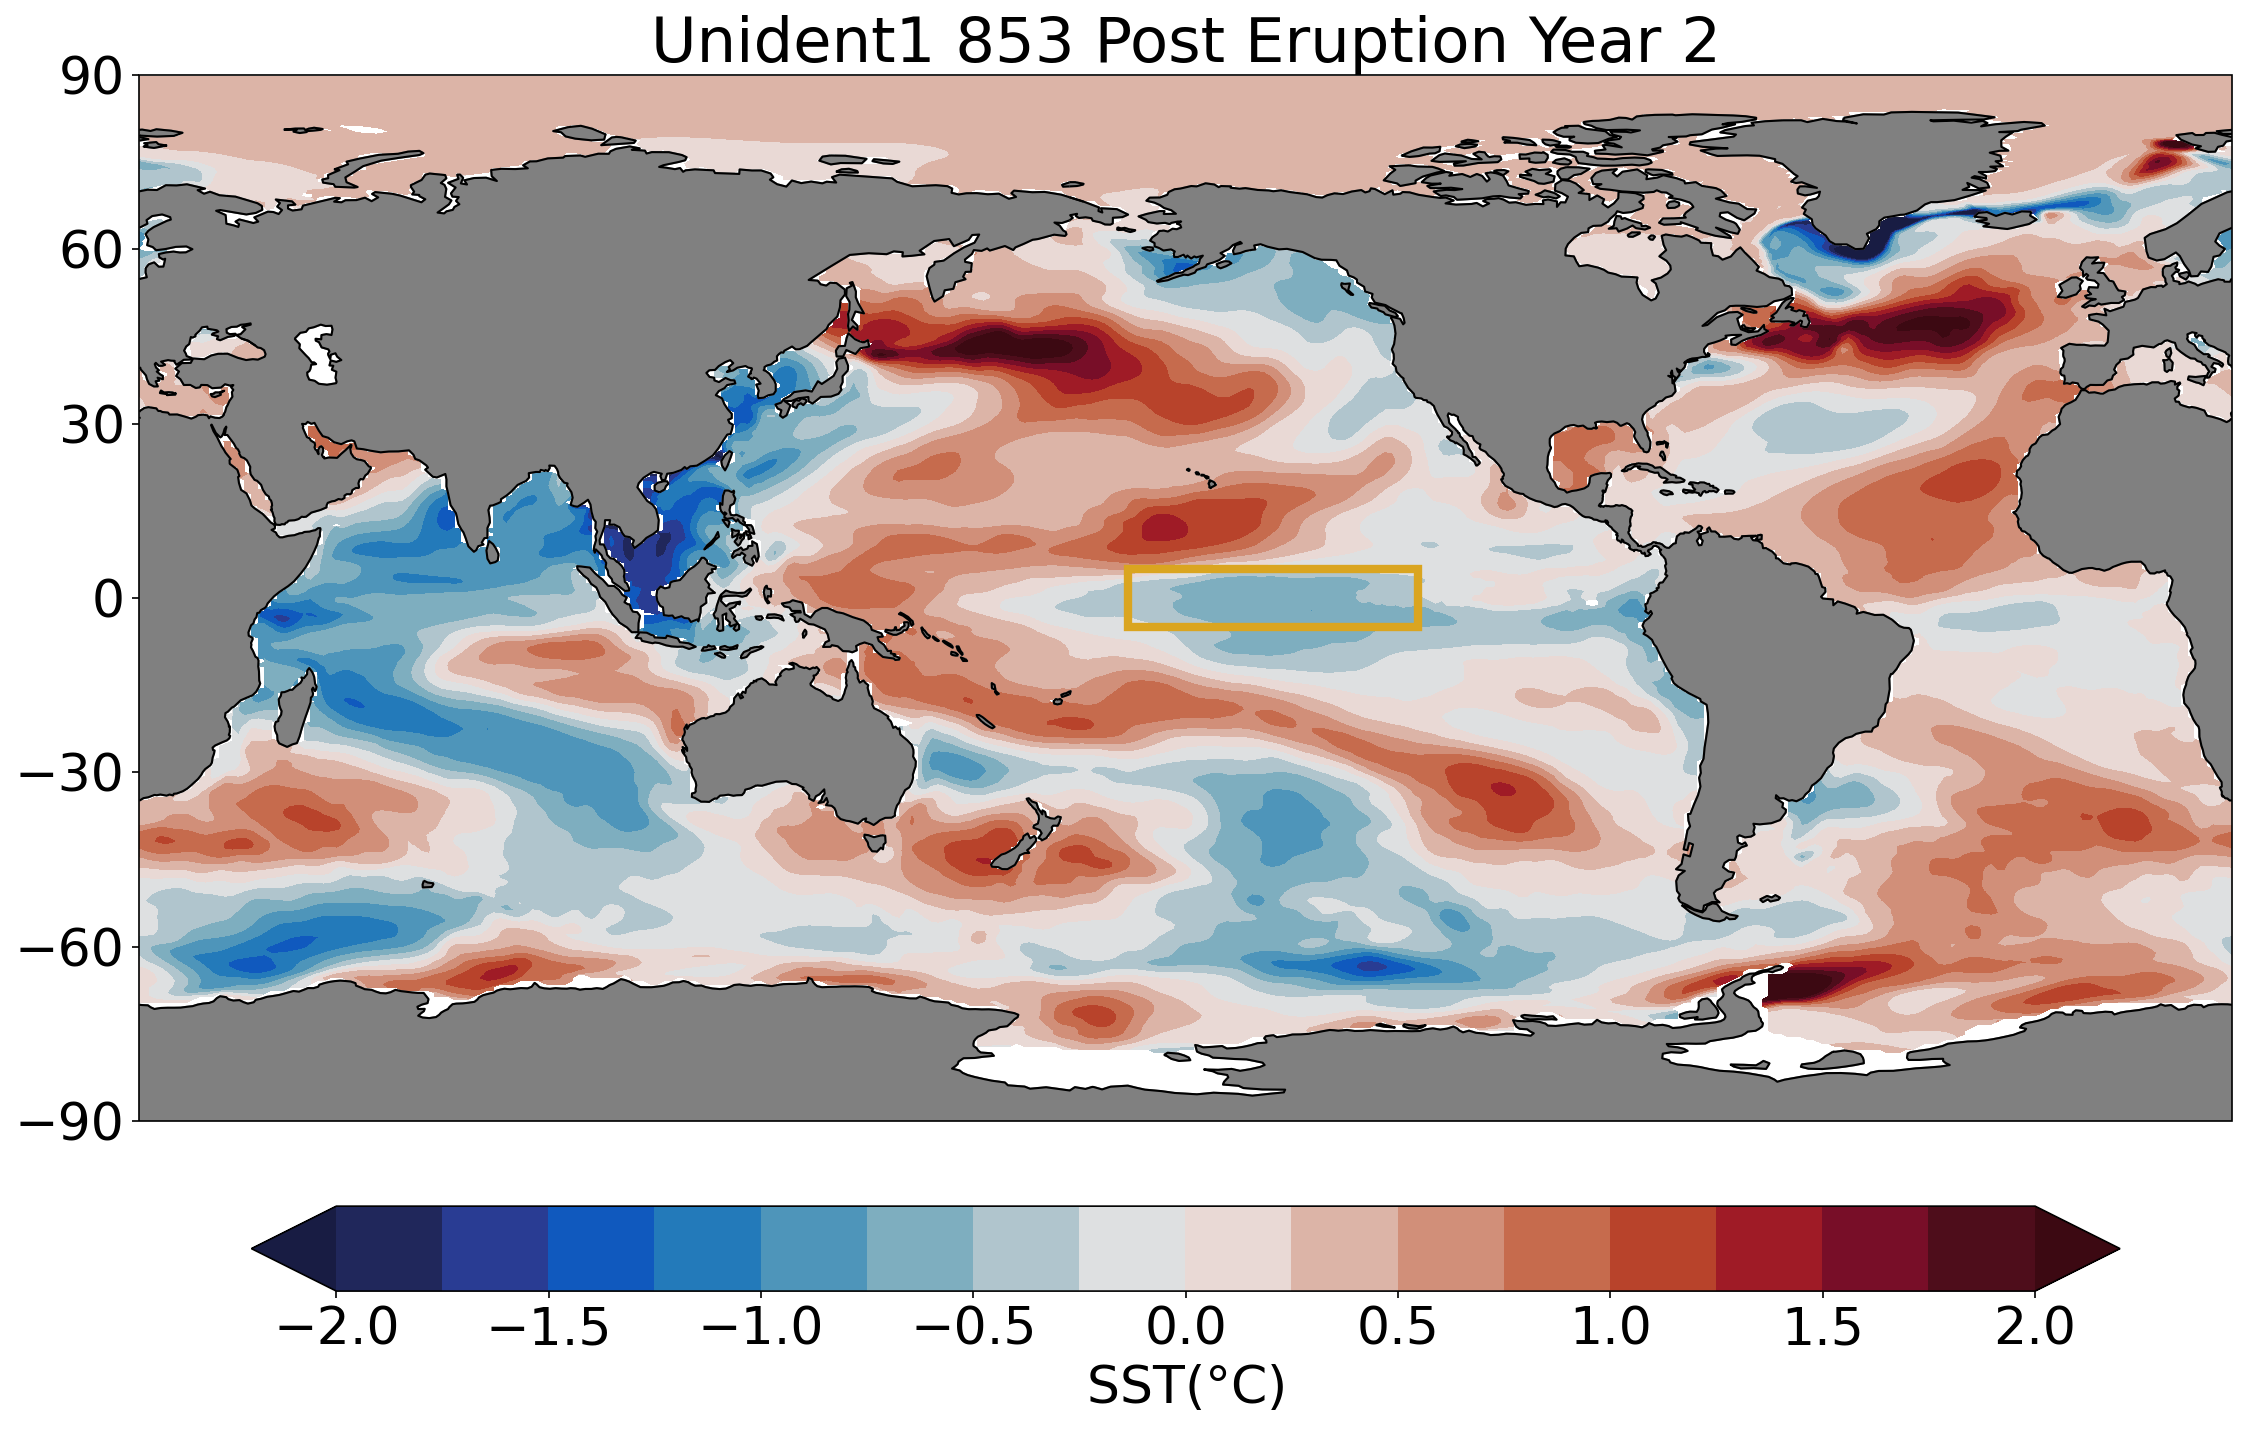

In [33]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-2.0
max_level=2.0
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_unident1,extend='both',levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='goldenrod',
   facecolor='none', linewidth=4))

plt.title('Unident1 853 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

#### Unidentified 2 869

In [34]:
unident2_anomaly = unident2-monthlydata

In [35]:
unident2_rm = rolling_mean(unident2_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [36]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [37]:
unident2_wm = ENSO_area_weighted_mean(unident2_rm,TAREA)
unident2_wm

array([-0.1761343 ,  0.27681154,  0.33535016, -0.00217801, -0.28933137,
       -0.70445884, -1.10901811, -1.4508823 ])

In [38]:
TLAT = extract.variables['TLAT'][:]

In [39]:
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [40]:
unident2_rsst = Trop_area_weighted_mean(unident2_rm,TAREA)

In [41]:
unident2_rsst

array([ 0.0865283 ,  0.17030136,  0.17655345,  0.11841318,  0.04968059,
       -0.02833302, -0.10426675, -0.17364132])

In [42]:
unident2_ra = unident2_rm[0] - unident2_rsst[0]

In [43]:
plot_data_unident2,new_lats,new_lons = pop_add_cyclic(unident2_ra,data['TLAT'],data['TLONG'])

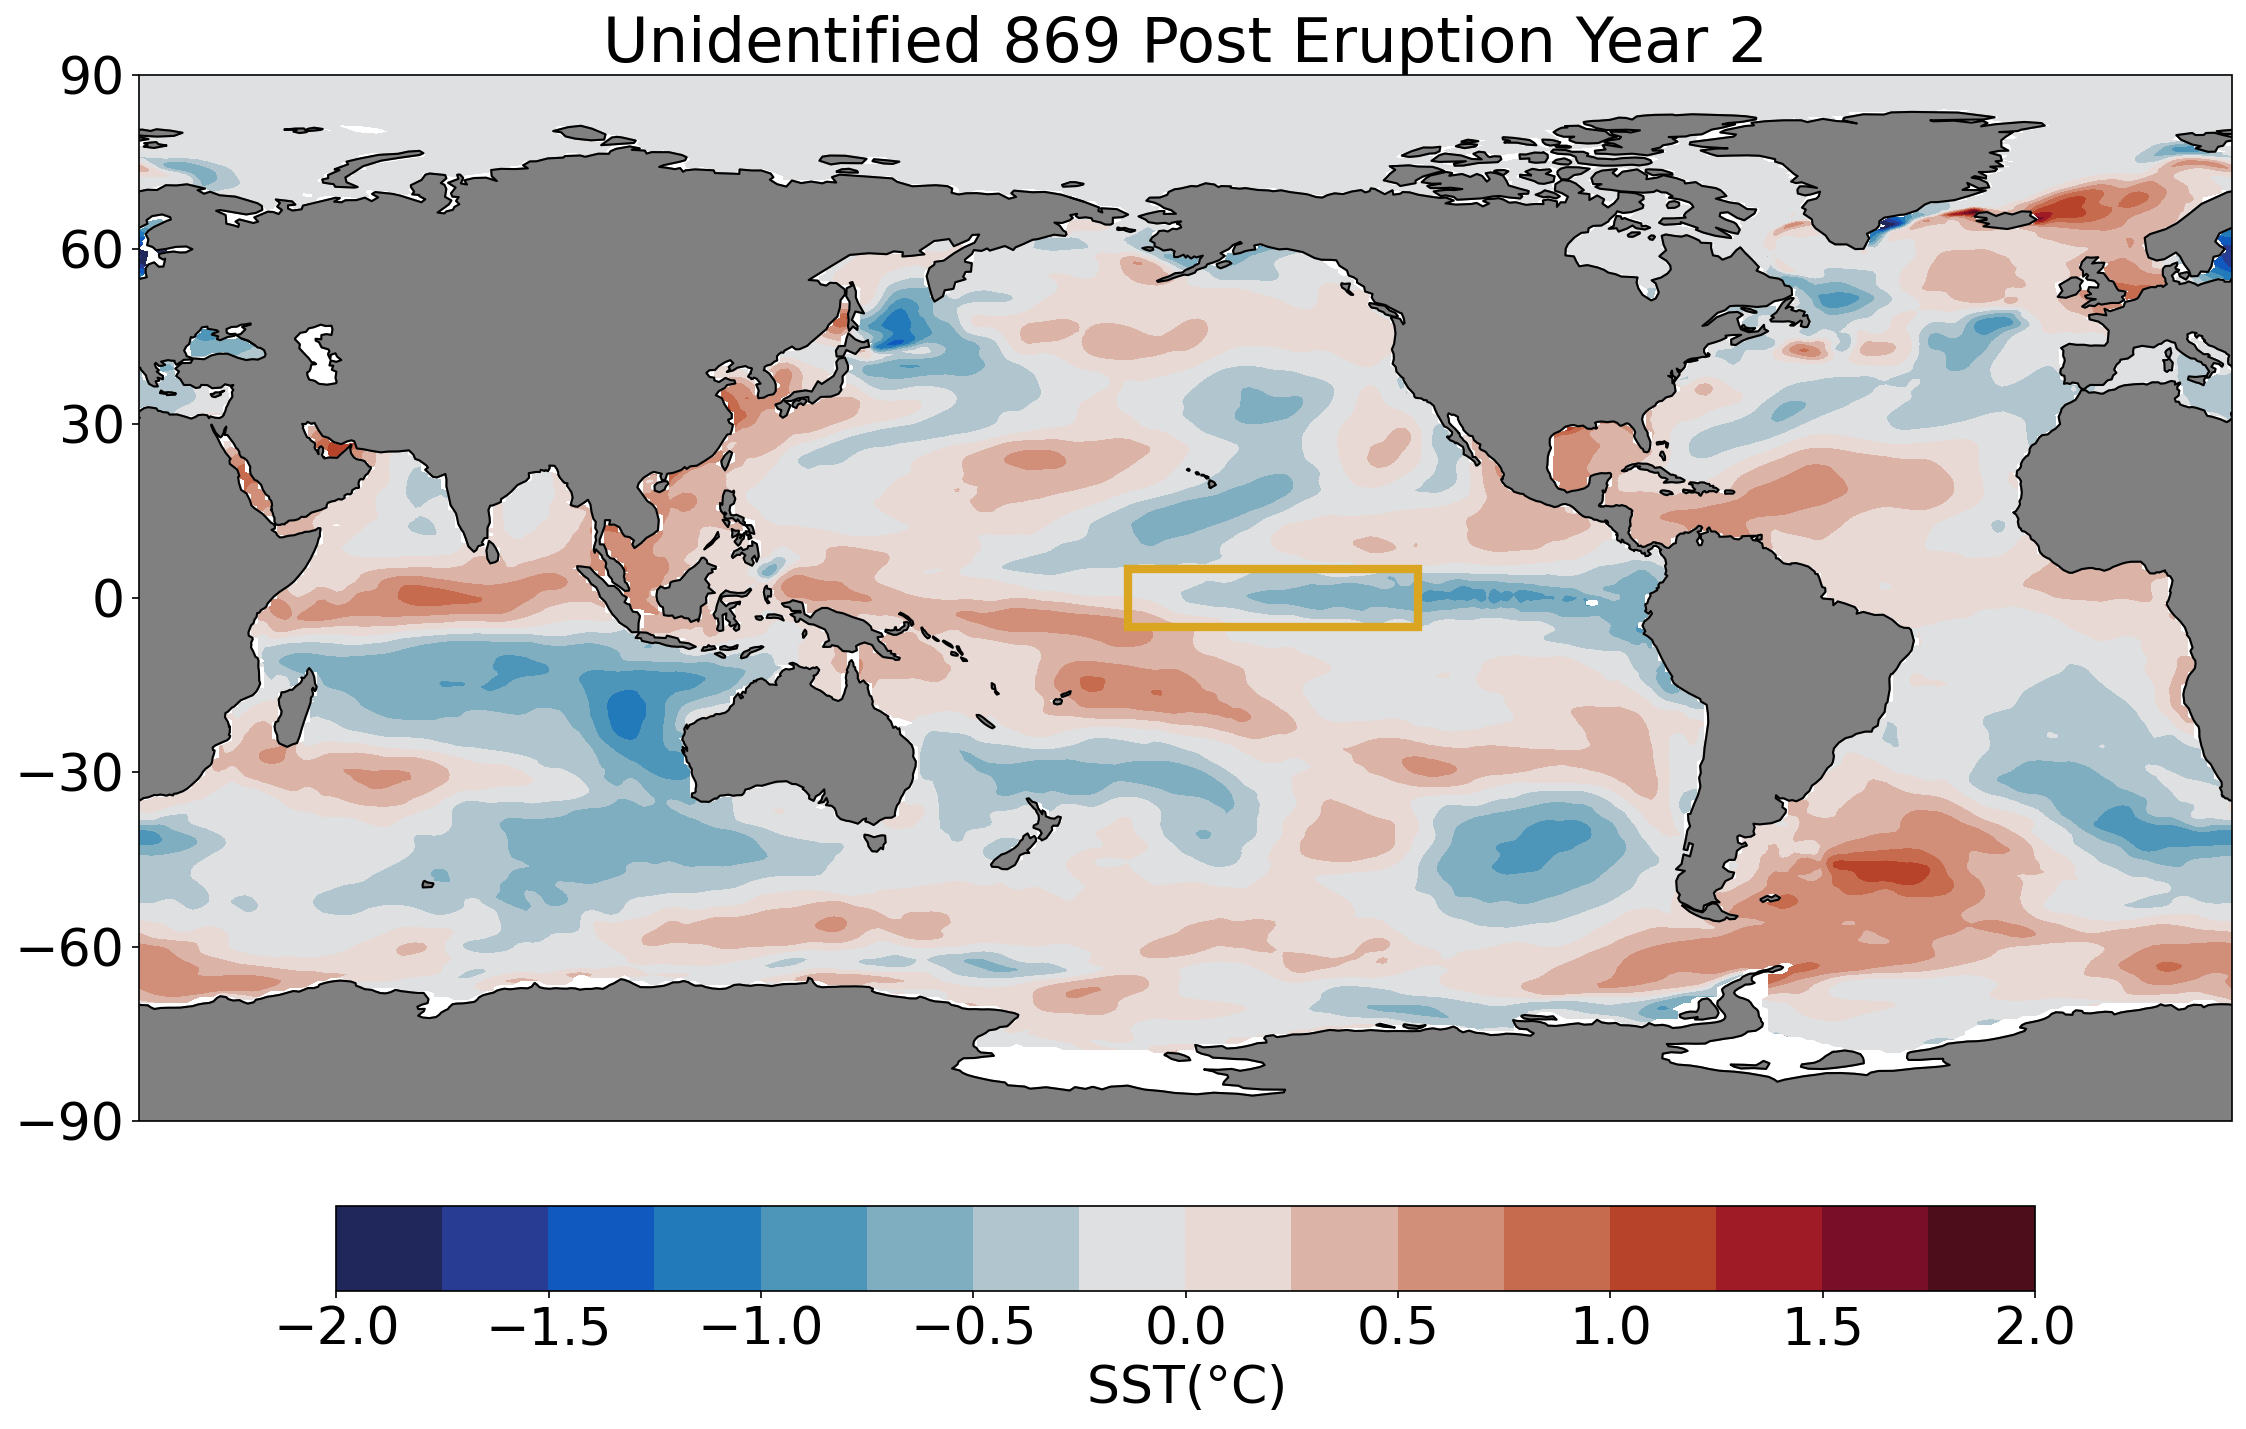

In [44]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-2.0
max_level=2.0
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_unident2,levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='goldenrod',
   facecolor='none', linewidth=4))

plt.title('Unidentified 869 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

#### Unidentified 3 960

In [45]:
unident3_anomaly = unident3-monthlydata

In [46]:
unident3_rm = rolling_mean(unident3_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [47]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [48]:
unident3_wm = ENSO_area_weighted_mean(unident3_rm,TAREA)
unident3_wm

array([-0.05028411,  0.29040867,  0.65062883,  0.74861398,  0.45253899,
        0.05717037, -0.33731217, -0.76592439])

In [49]:
TLAT = extract.variables['TLAT'][:]

In [50]:
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [51]:
unident3_rsst = Trop_area_weighted_mean(unident3_rm,TAREA)
unident3_rsst

array([-0.29952835, -0.25063807, -0.17973548, -0.1250182 , -0.12789881,
       -0.14721509, -0.18134321, -0.24351045])

In [52]:
unident3_ra = unident3_rm[0] - unident3_rsst[0]

In [53]:
plot_data_unident3,new_lats,new_lons = pop_add_cyclic(unident3_ra,data['TLAT'],data['TLONG']) 

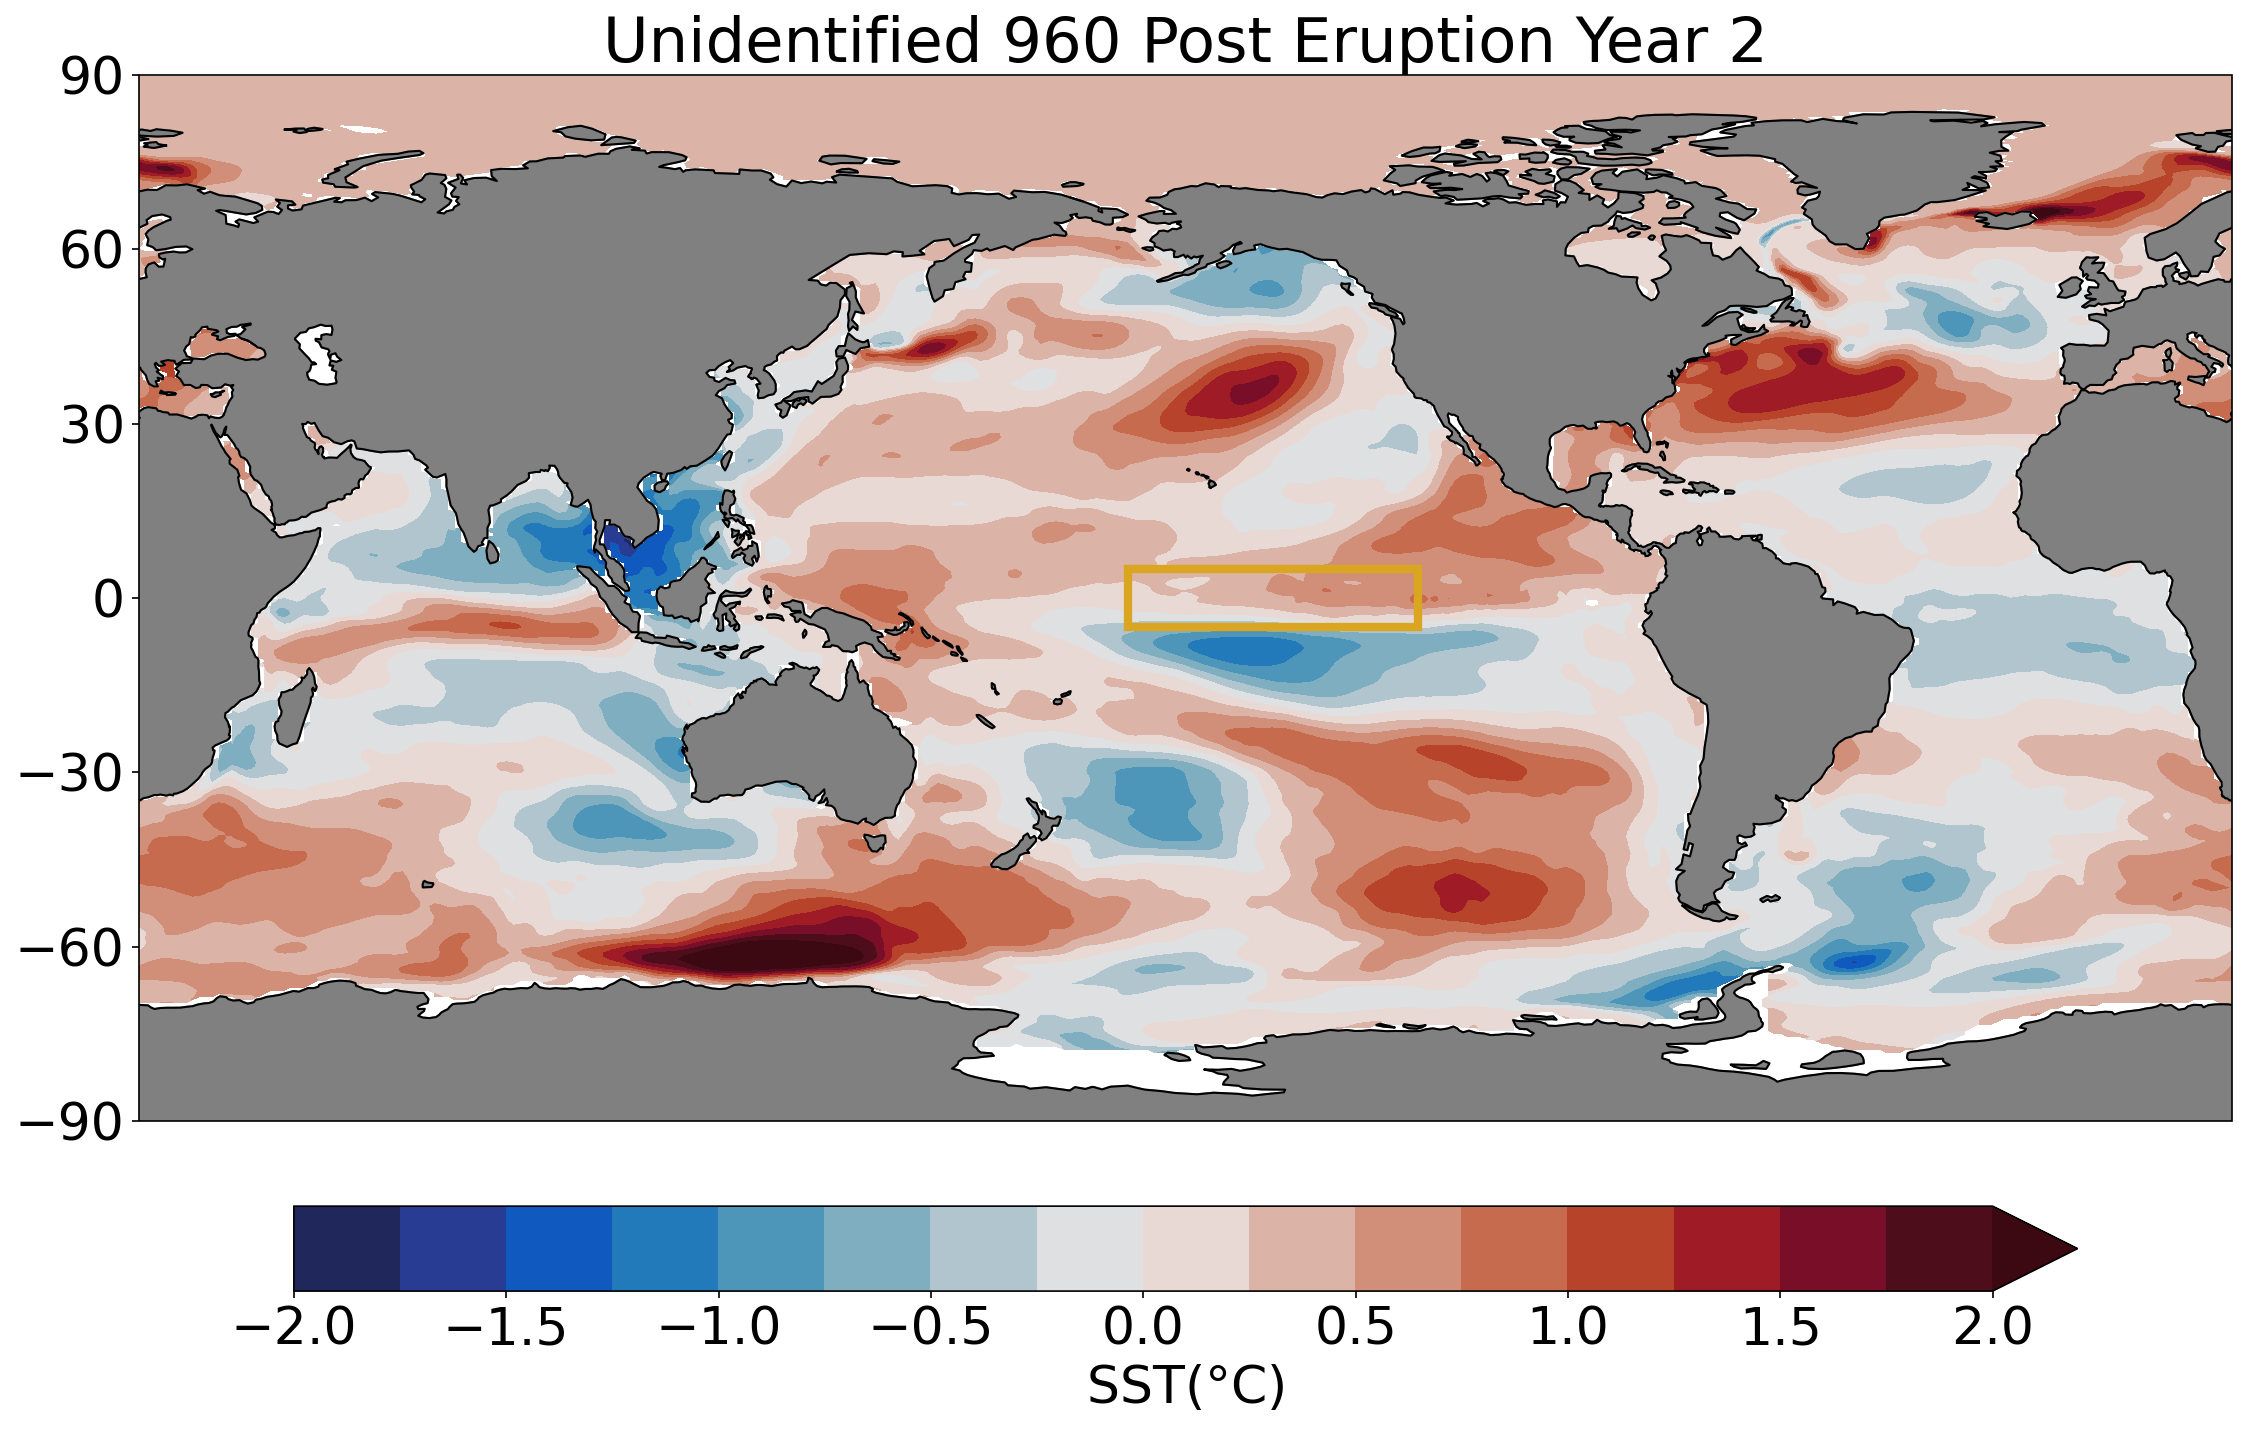

In [55]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-2.0
max_level=2.0
step_level=0.25

#levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_unident3,extend='max',levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='goldenrod',
   facecolor='none', linewidth=4))

plt.title('Unidentified 960 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

#### Unidentified 4 1039

In [56]:
unident4_anomaly = unident4-monthlydata

In [57]:
unident4_rm = rolling_mean(unident4_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [58]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [59]:
unident4_wm = ENSO_area_weighted_mean(unident4_rm,TAREA)
unident4_wm

array([-1.05790163, -0.52225174, -0.13261339, -0.10233021, -0.26673936,
       -0.69112777, -1.13901269, -1.54082753])

In [60]:
TLAT = extract.variables['TLAT'][:]

In [61]:
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [62]:
unident4_rsst = Trop_area_weighted_mean(unident4_rm,TAREA)
unident4_rsst

array([-0.16110078, -0.0639942 , -0.00769373,  0.02020546,  0.00756065,
       -0.06095252, -0.15336567, -0.23297668])

In [63]:
unident4_ra = unident4_rm[0] - unident4_rsst[0]

In [64]:
plot_data_unident4,new_lats,new_lons = pop_add_cyclic(unident4_ra,data['TLAT'],data['TLONG']) 

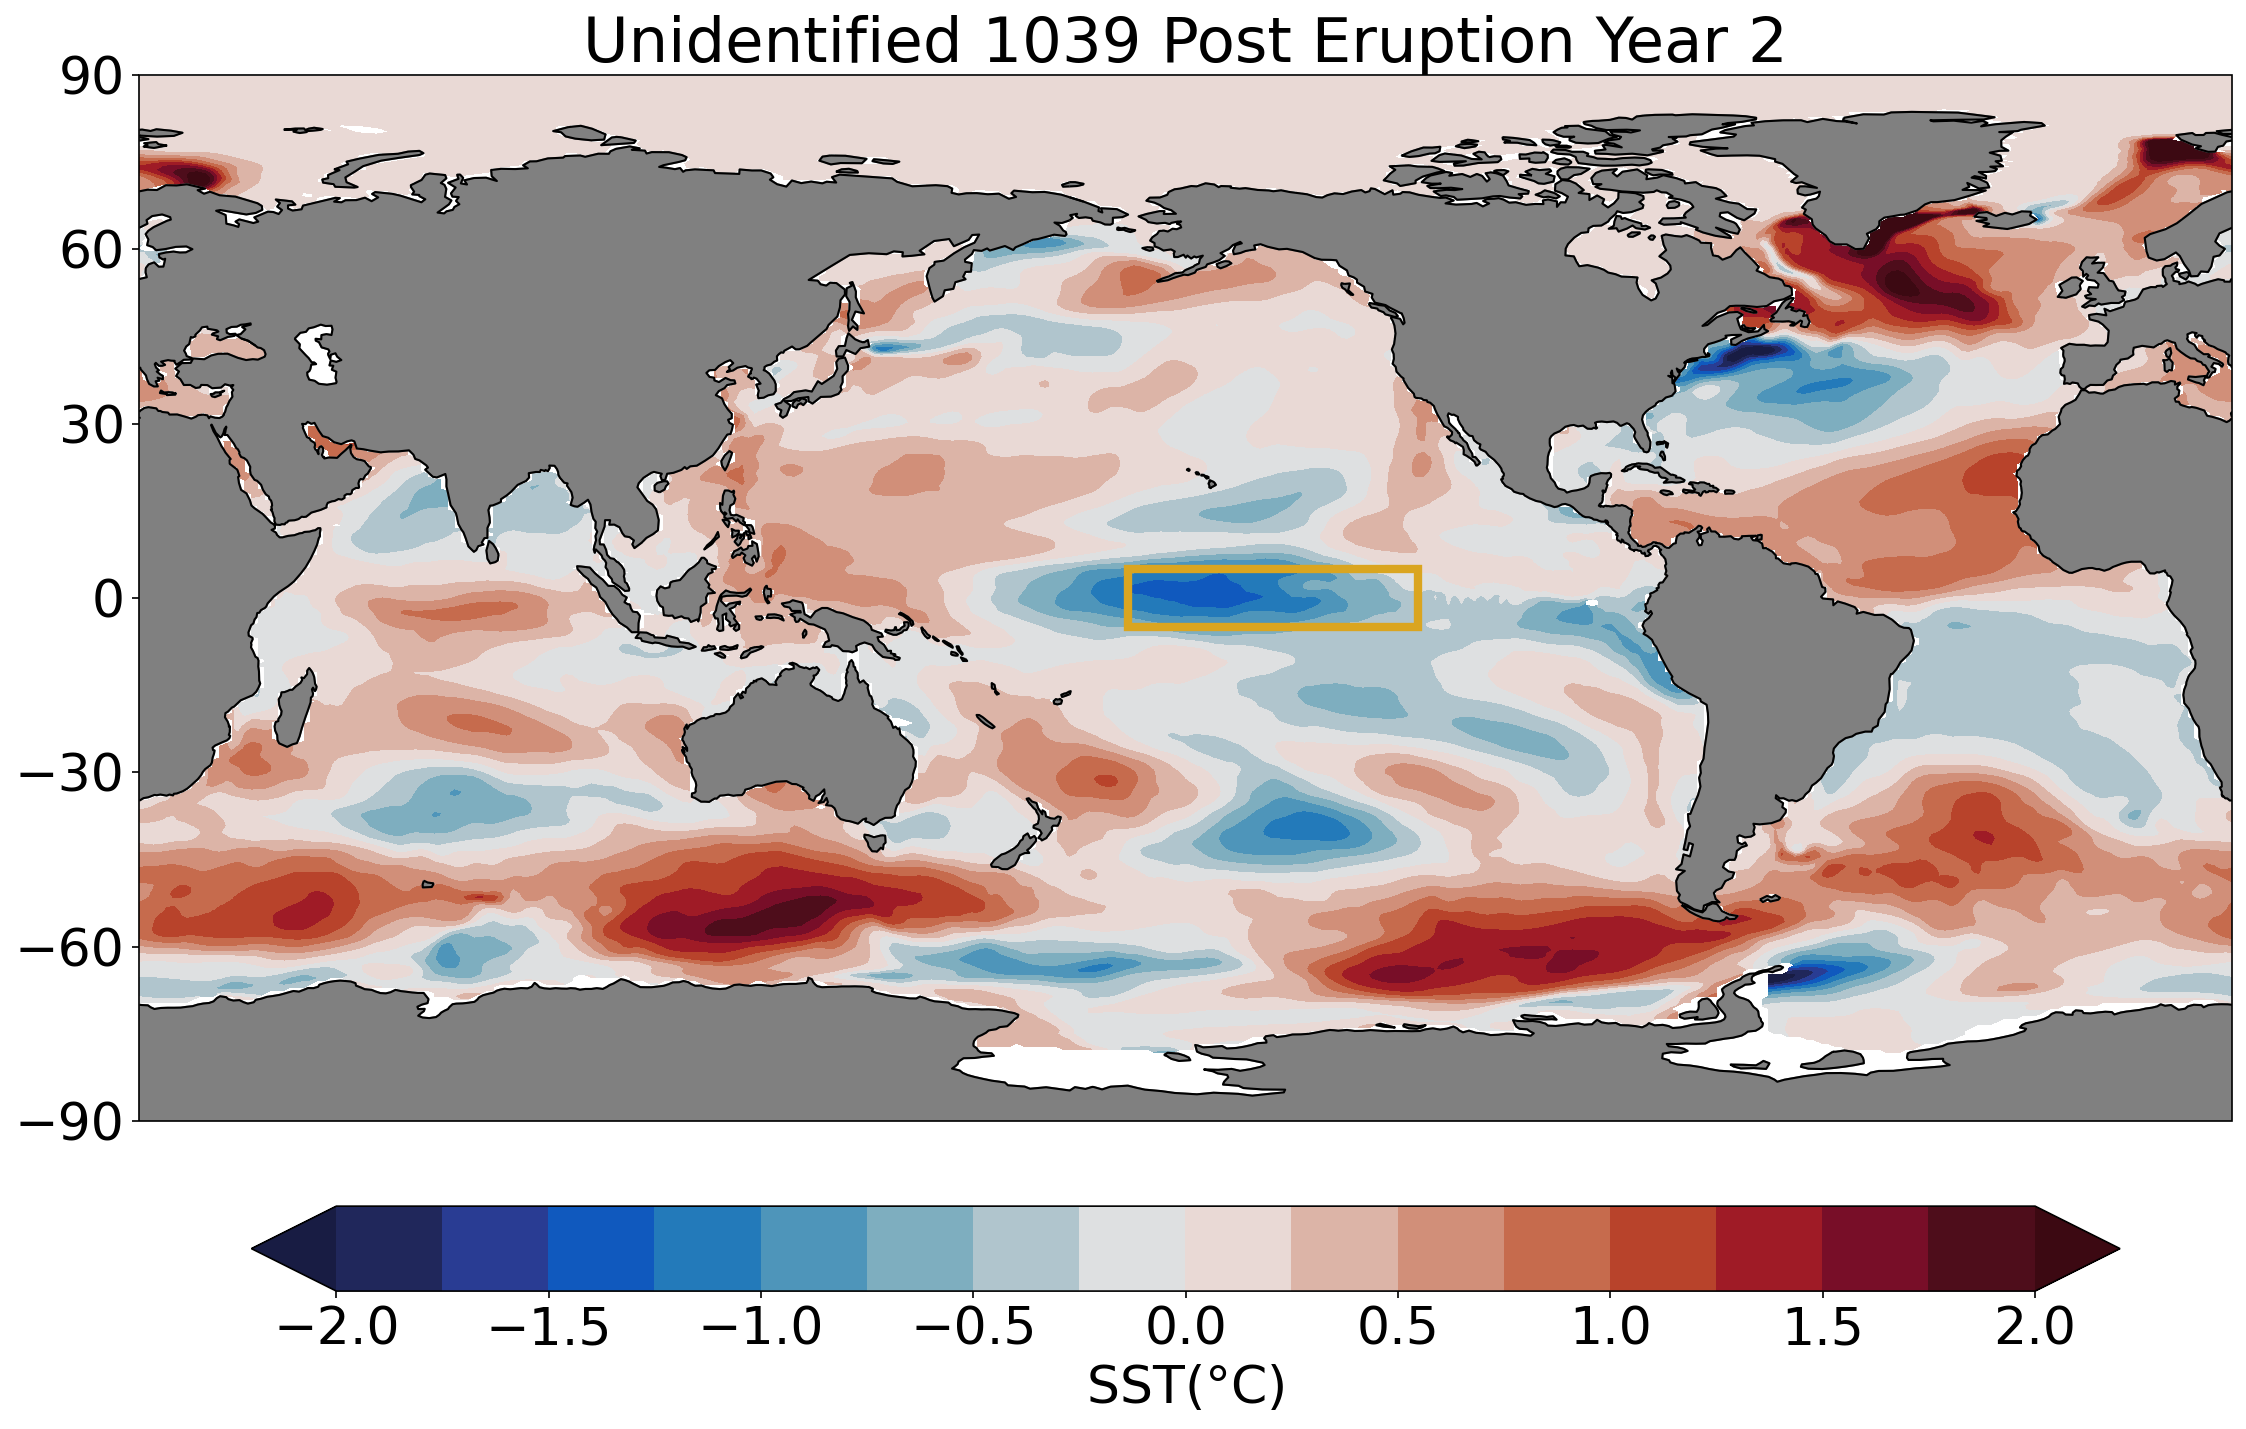

In [66]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-2.0
max_level=2.0
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_unident4,extend='both',levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='goldenrod',
   facecolor='none', linewidth=4))

plt.title('Unidentified 1039 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

#### Unidentified 5 1269

In [67]:
unident5_anomaly = unident5-monthlydata

In [68]:
unident5_rm = rolling_mean(unident5_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [69]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [70]:
unident5_wm = ENSO_area_weighted_mean(unident5_rm,TAREA)
unident5_wm

array([ 0.38750367,  1.18347109,  1.1427609 ,  0.2372752 , -0.6098824 ,
       -1.42676713, -2.1992434 , -2.74997697])

In [71]:
TLAT = extract.variables['TLAT'][:]

In [72]:
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [73]:
unident5_rsst = Trop_area_weighted_mean(unident5_rm,TAREA)
unident5_rsst

array([-0.0845055 ,  0.04238804,  0.06224733, -0.03500638, -0.13462825,
       -0.23638749, -0.33158335, -0.41780766])

In [74]:
unident5_ra = unident5_rm[0] - unident5_rsst[0]

In [75]:
plot_data_unident5,new_lats,new_lons = pop_add_cyclic(unident5_ra,data['TLAT'],data['TLONG']) 

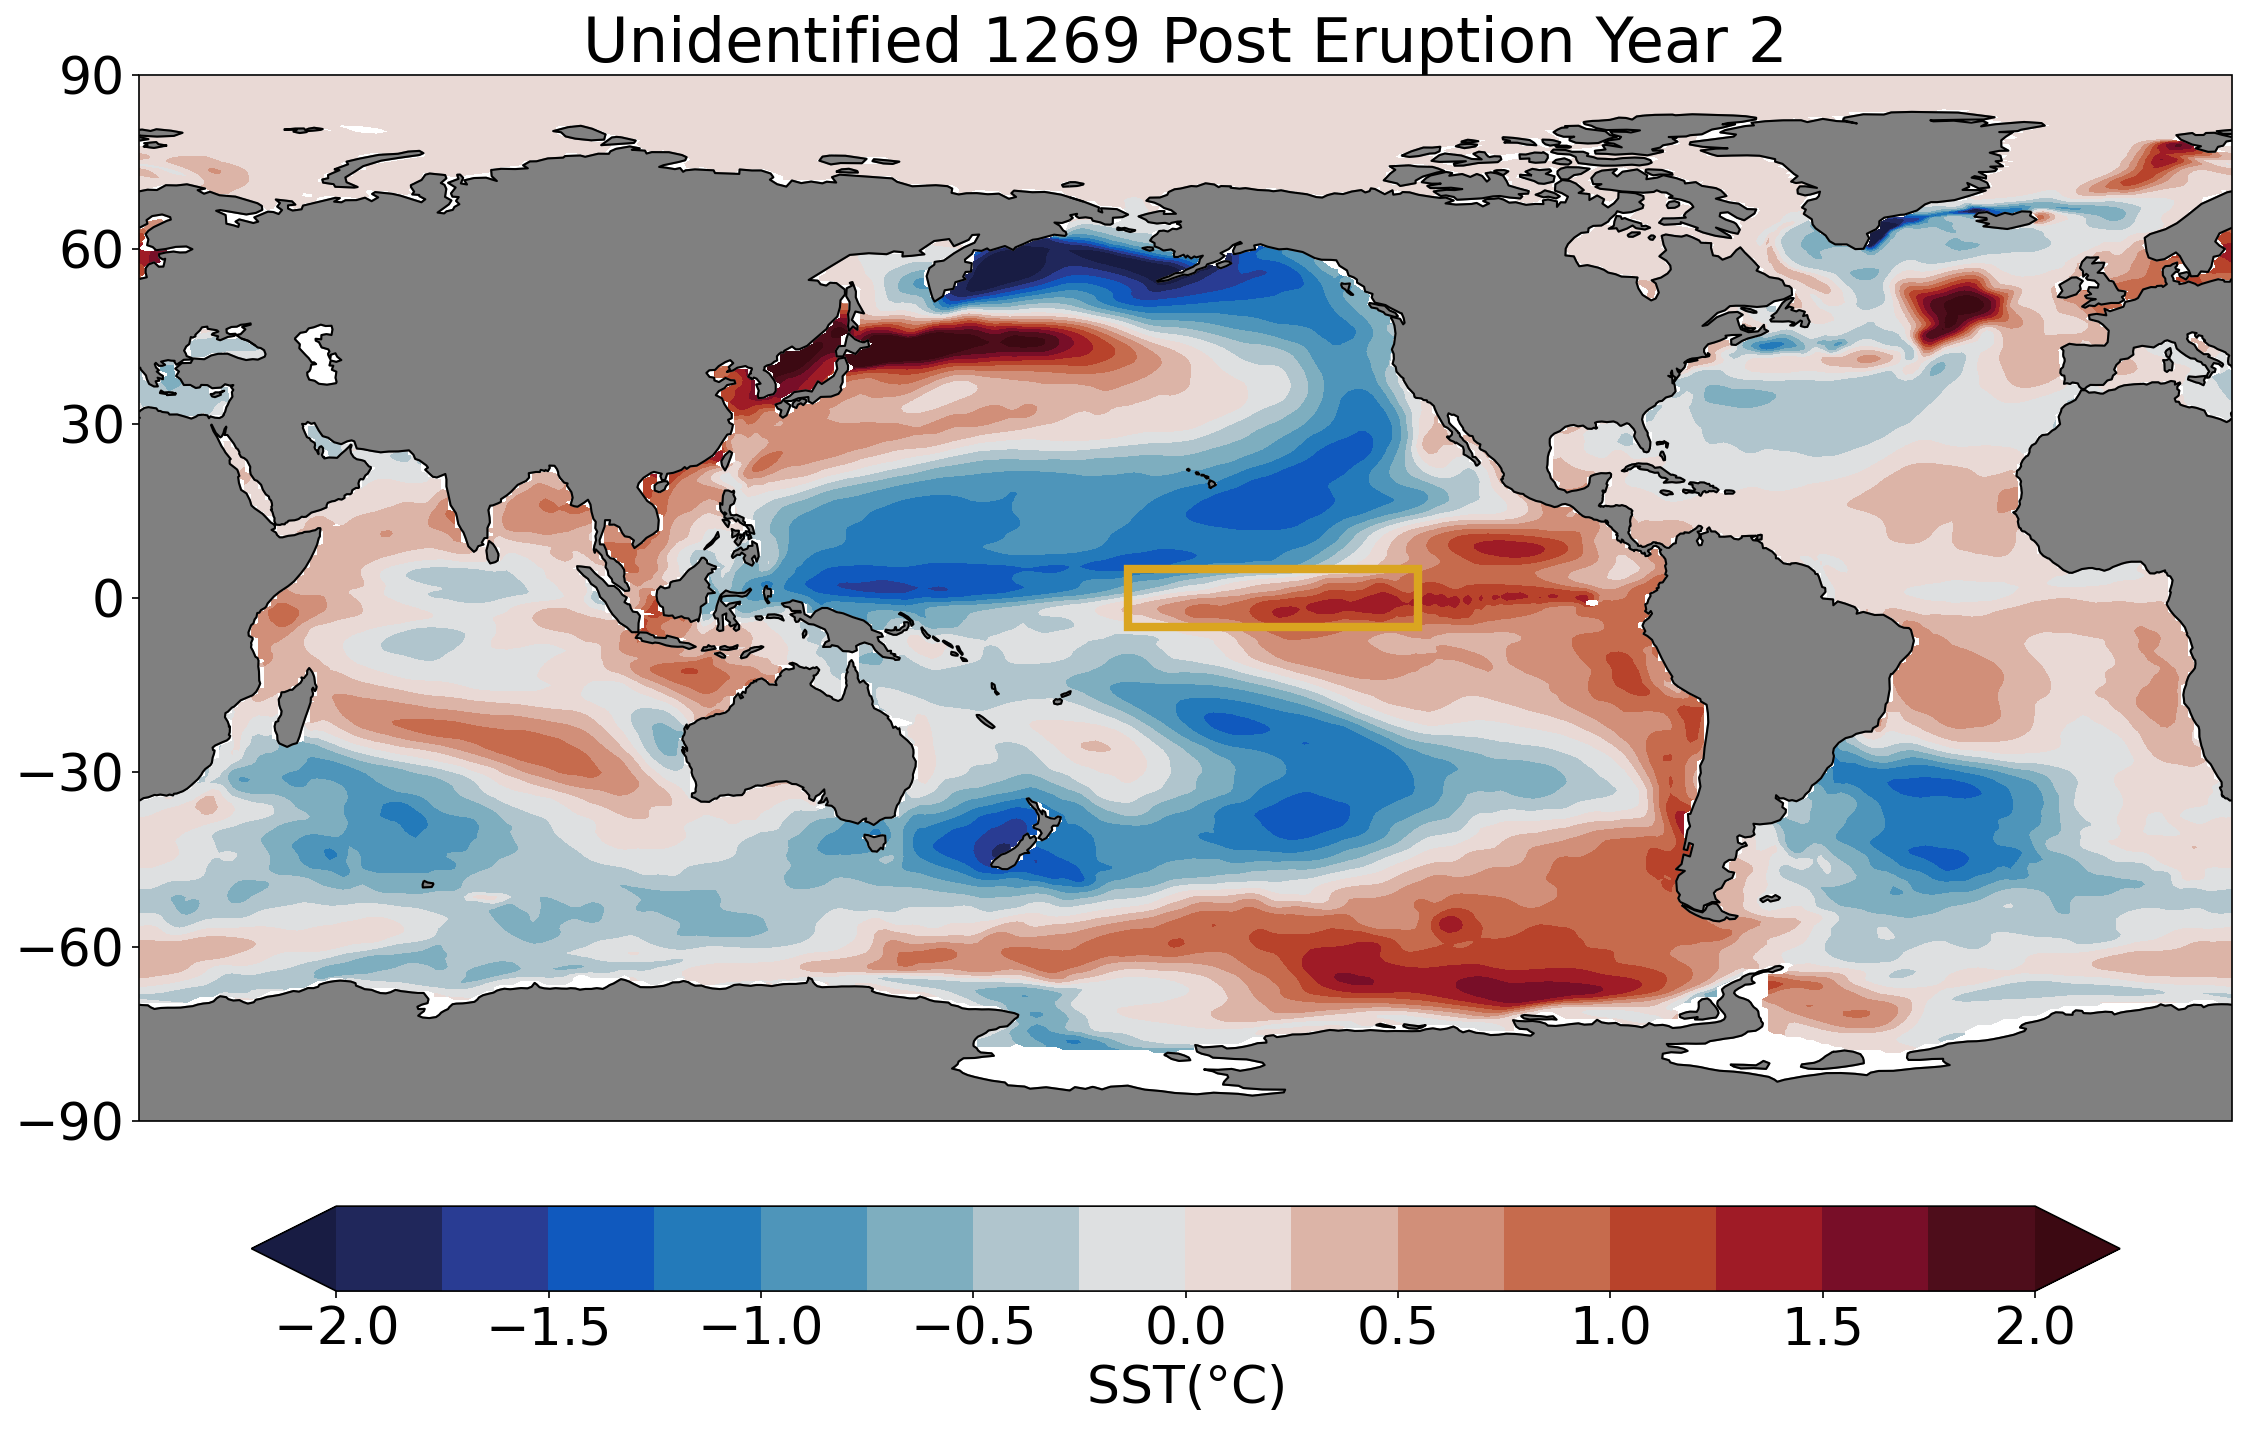

In [78]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-2.0
max_level=2.0
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_unident5,extend='both',levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='goldenrod',
   facecolor='none', linewidth=4))

plt.title('Unidentified 1269 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

#### Unidentified 6 1378

In [79]:
unident6_anomaly = unident6-monthlydata

In [80]:
unident6_rm = rolling_mean(unident6_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [81]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [82]:
unident6_wm = ENSO_area_weighted_mean(unident6_rm,TAREA)
unident6_wm

array([ 0.13775322,  0.2938876 ,  0.28668592,  0.35317253,  0.26493983,
        0.11239764, -0.10902464, -0.14776357])

In [83]:
TLAT = extract.variables['TLAT'][:]

In [84]:
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [85]:
unident6_rsst = Trop_area_weighted_mean(unident6_rm,TAREA)
unident6_rsst

array([-0.02159701, -0.00174364,  0.00885285,  0.01412687, -0.01236413,
       -0.03151408, -0.07121132, -0.09258398])

In [86]:
unident6_ra = unident6_rm[0] - unident6_rsst[0]

In [87]:
plot_data_unident6,new_lats,new_lons = pop_add_cyclic(unident6_ra,data['TLAT'],data['TLONG'])

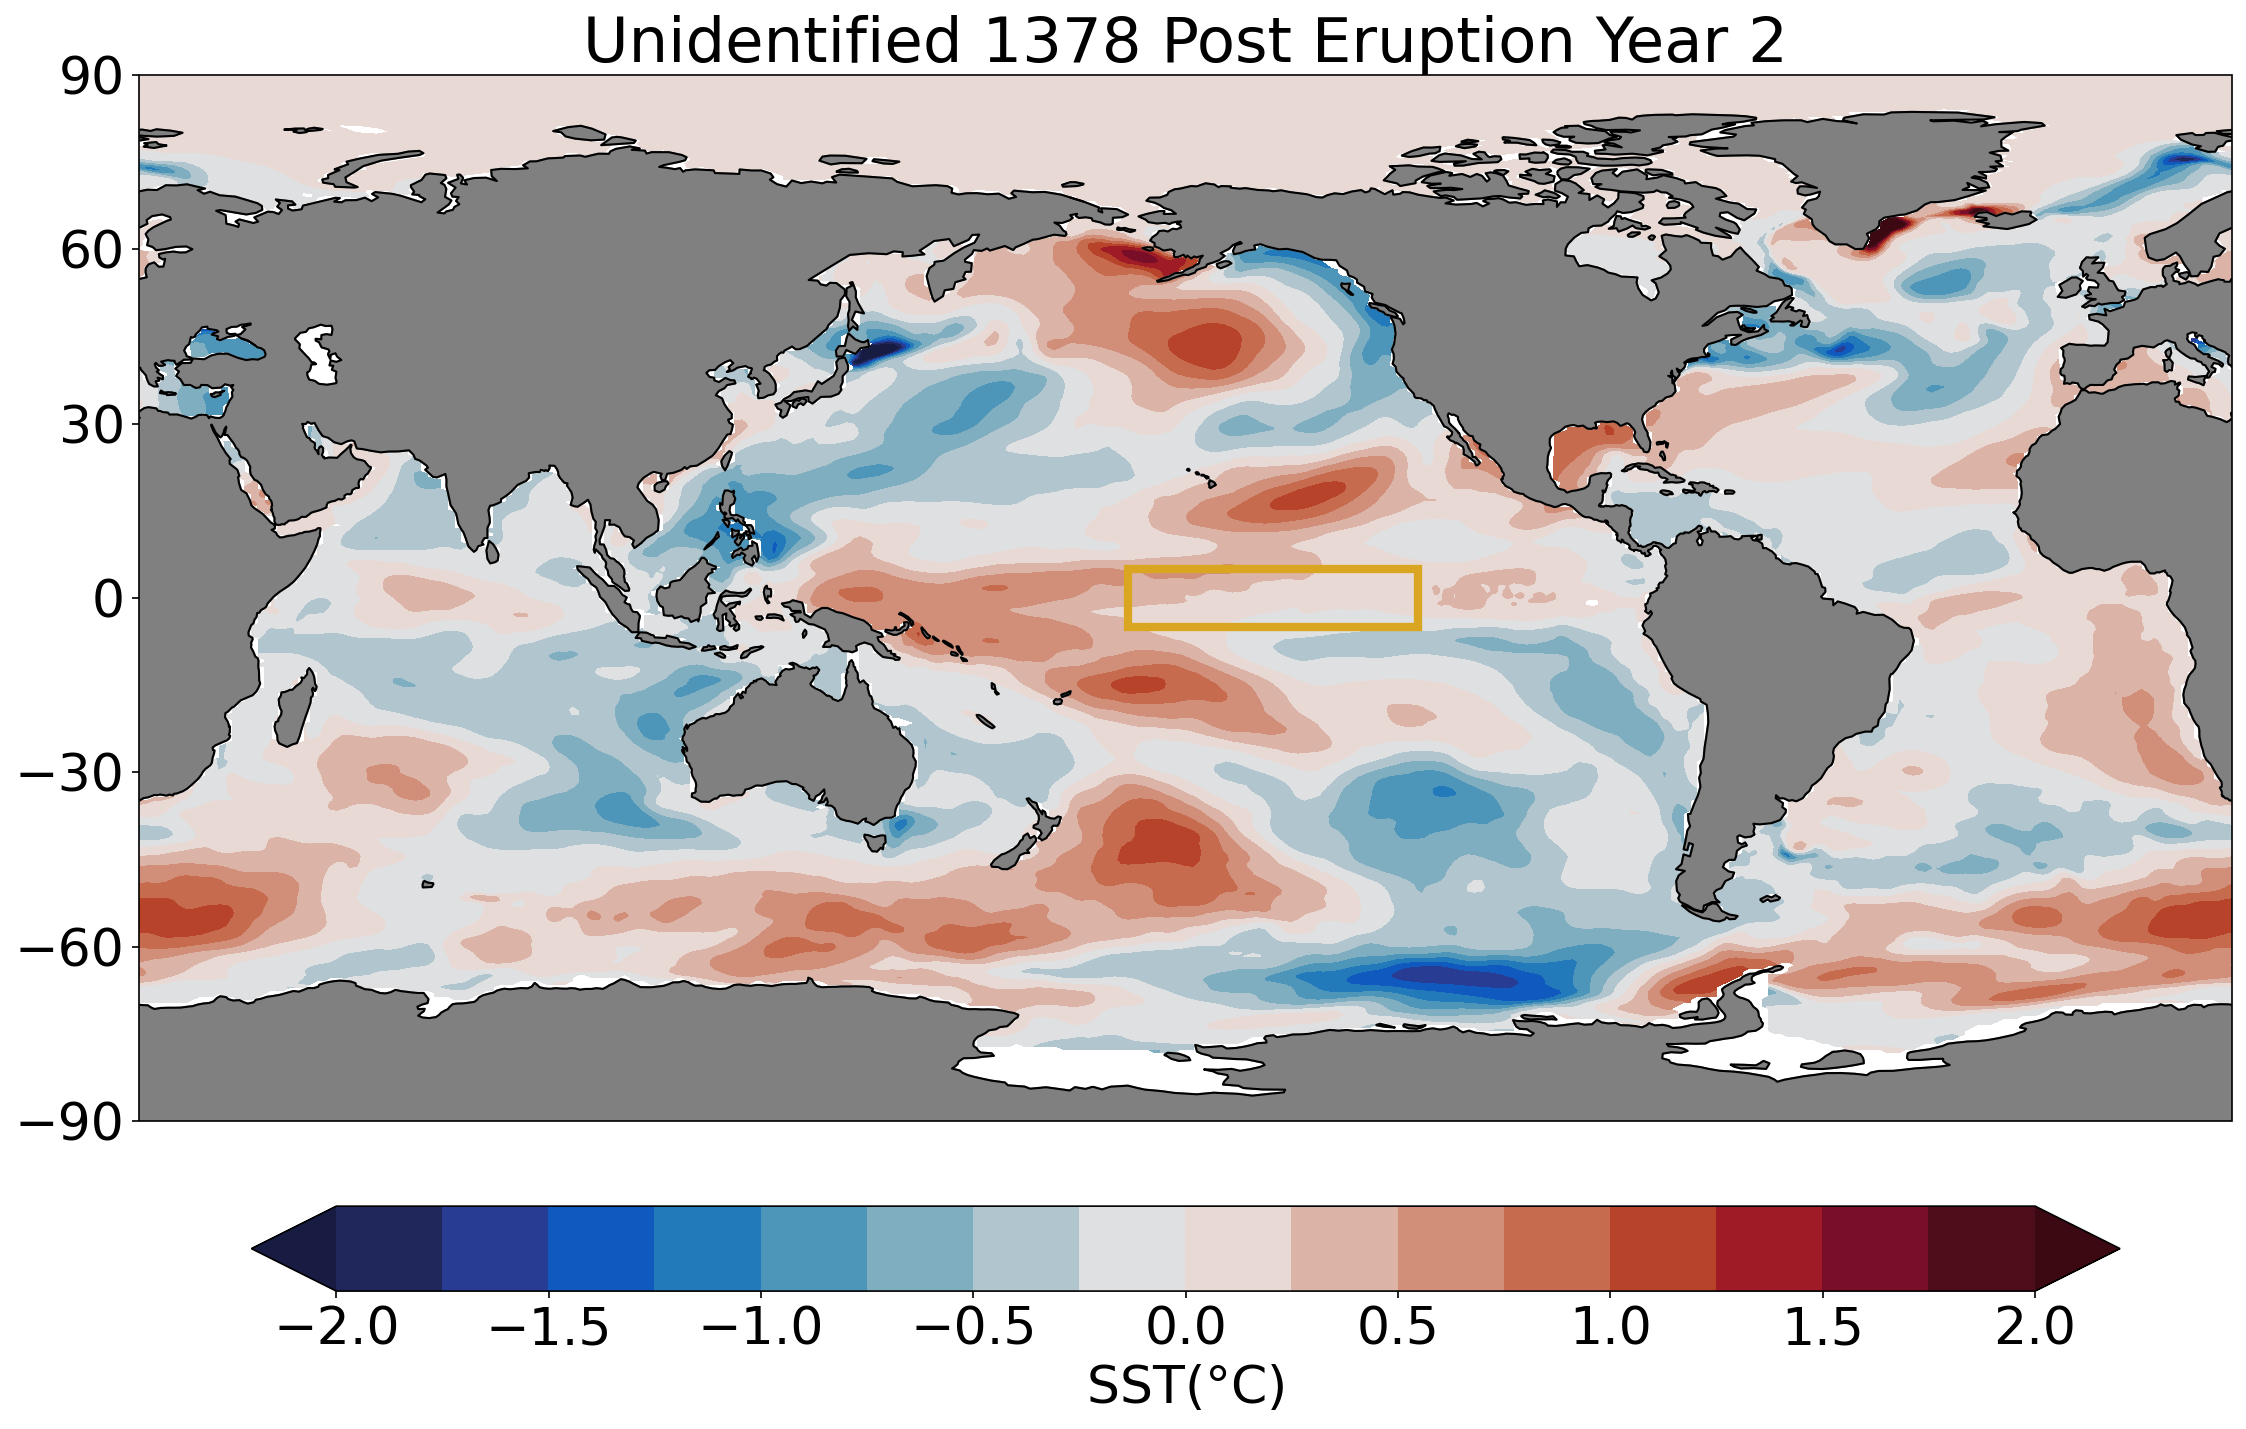

In [89]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-2.0
max_level=2.0
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_unident6,extend='both',levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='goldenrod',
   facecolor='none', linewidth=4))

plt.title('Unidentified 1378 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

#### Unidentified 7 1478

In [90]:
unident7_anomaly = unident7-monthlydata

In [91]:
unident7_rm = rolling_mean(unident7_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [92]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [93]:
unident7_wm = ENSO_area_weighted_mean(unident7_rm,TAREA)
unident7_wm

array([-0.81810642, -0.646576  , -0.48346686, -0.29677126, -0.16007129,
       -0.03788035, -0.0507487 , -0.22561163])

In [94]:
TLAT = extract.variables['TLAT'][:]
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [95]:
unident7_rsst = Trop_area_weighted_mean(unident7_rm,TAREA)
unident7_rsst

array([-0.1439249 , -0.1390859 , -0.14093989, -0.11961758, -0.1014512 ,
       -0.08900902, -0.10686085, -0.11363783])

In [96]:
unident7_ra = unident7_rm[0] - unident7_rsst[0]

In [97]:
plot_data_unident7,new_lats,new_lons = pop_add_cyclic(unident7_ra,data['TLAT'],data['TLONG']) 

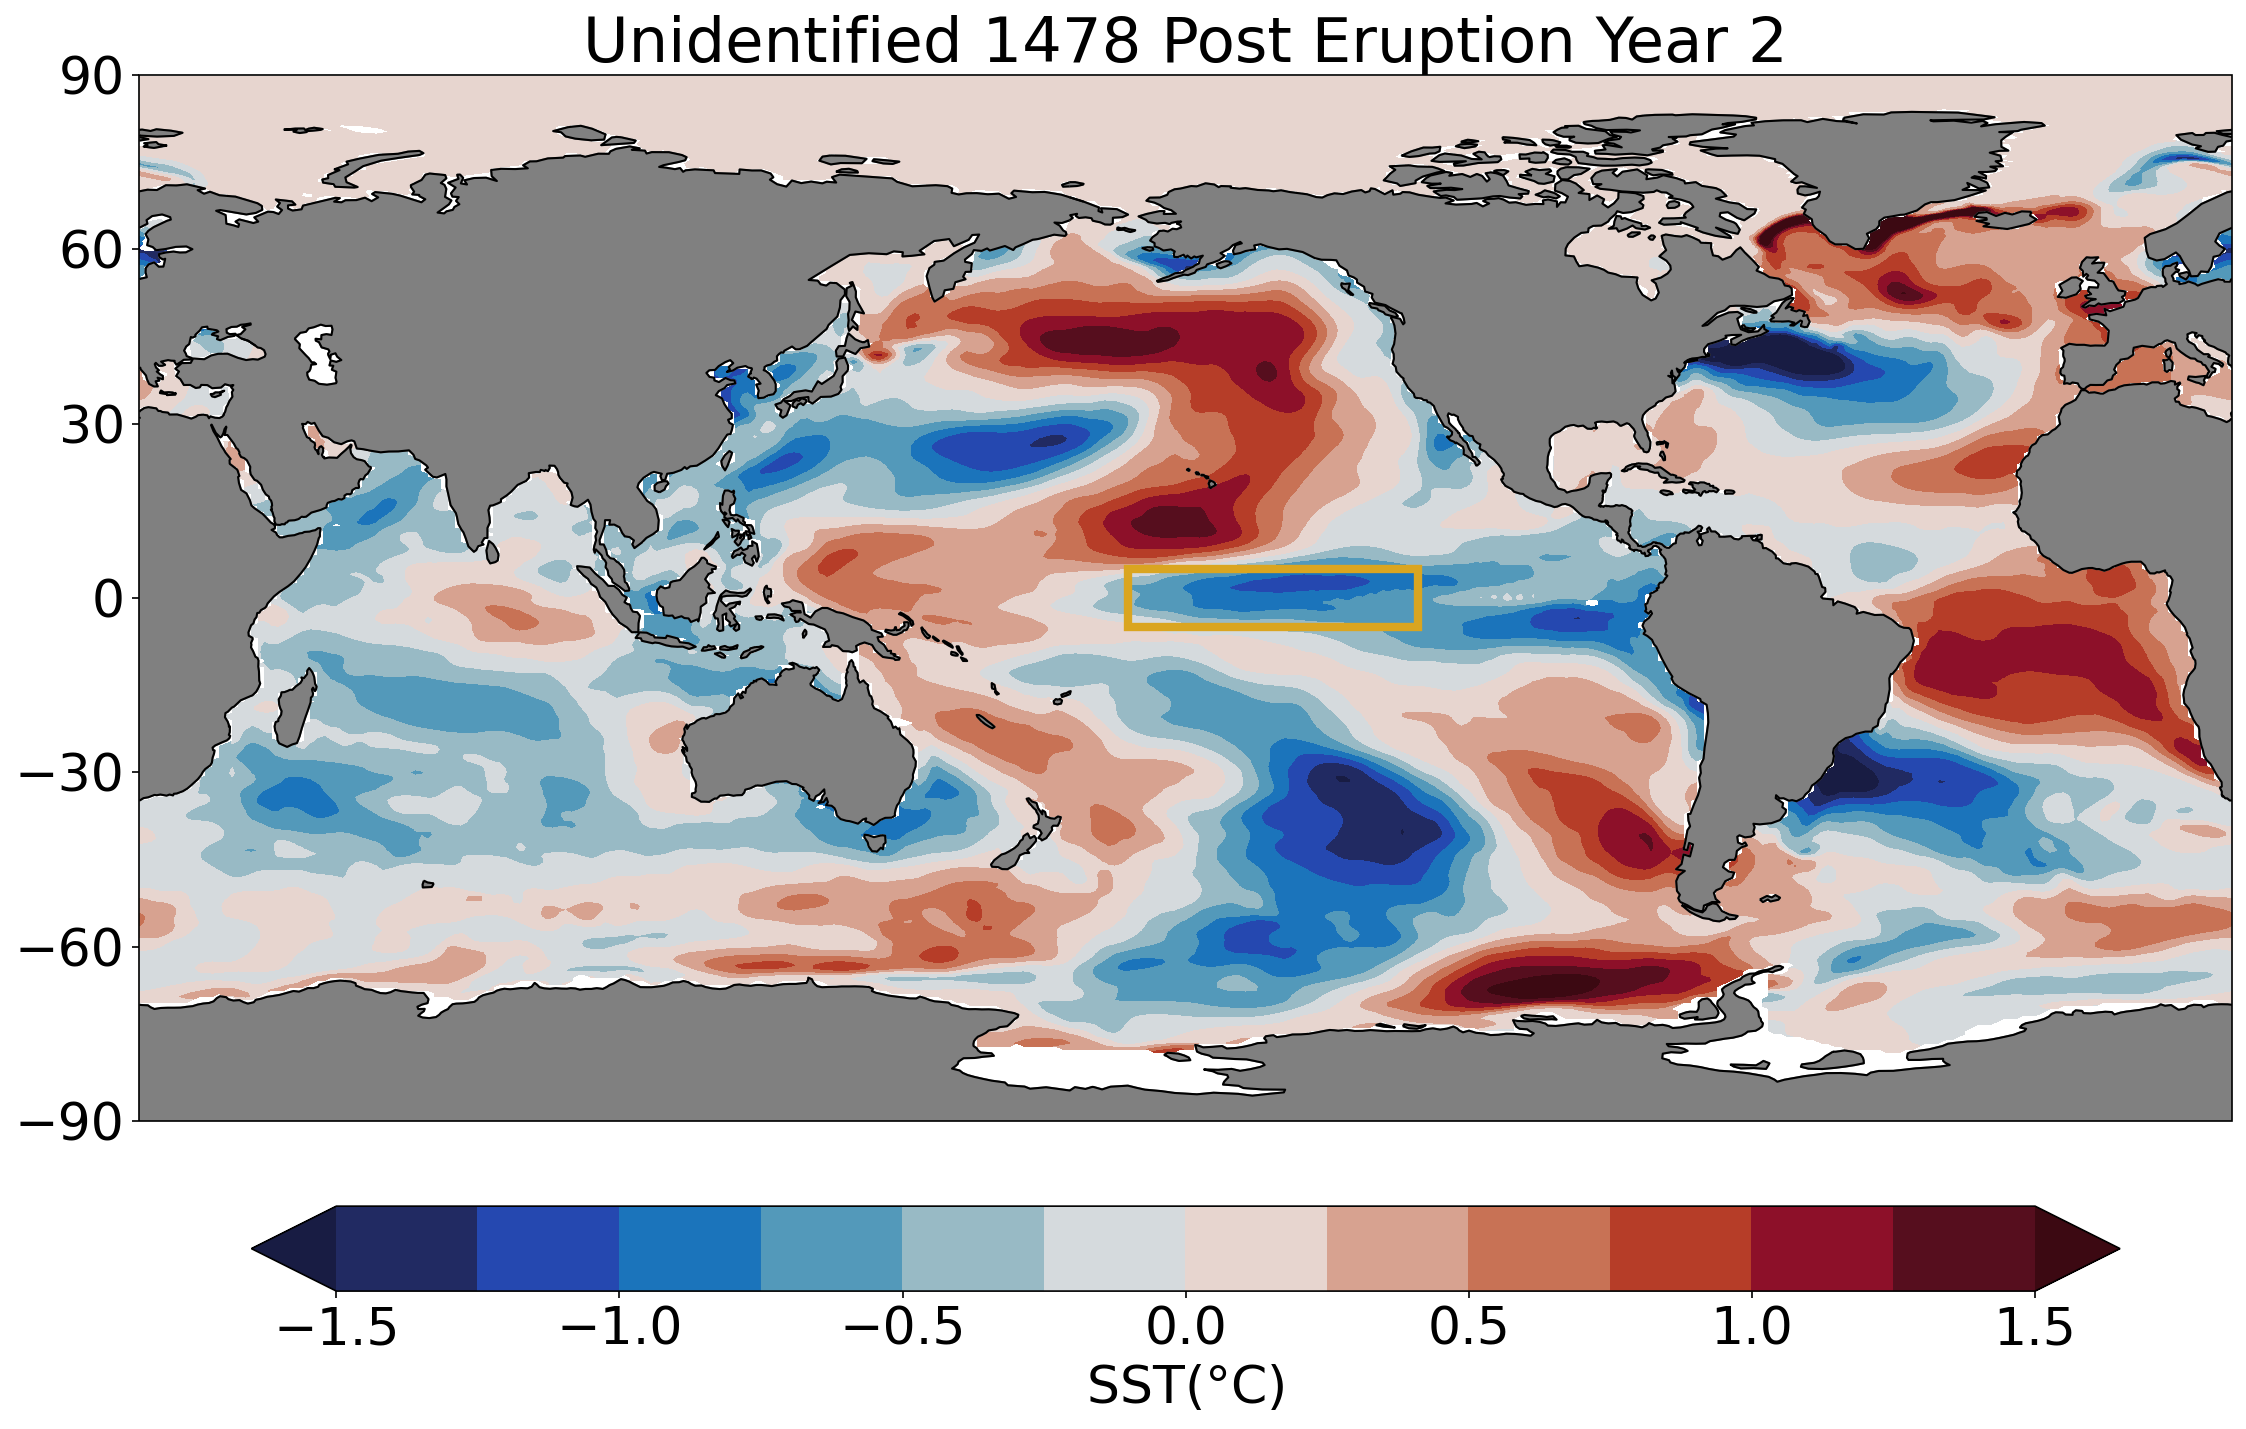

In [99]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-1.5
max_level=1.5
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_unident7,extend='both',levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='goldenrod',
   facecolor='none', linewidth=4))

plt.title('Unidentified 1478 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

#### Unidentified 8 1541

In [100]:
unident8_anomaly = unident8-monthlydata

In [101]:
unident8_rm = rolling_mean(unident8_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [102]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [103]:
unident8_wm = ENSO_area_weighted_mean(unident8_rm,TAREA)
unident8_wm

array([-2.21381676, -1.77768139, -1.44811399, -1.26572434, -1.23997748,
       -1.51162453, -1.94214739, -2.23886977])

In [104]:
TLAT = extract.variables['TLAT'][:]
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [105]:
unident8_rsst = Trop_area_weighted_mean(unident8_rm,TAREA)
unident8_rsst

array([-0.25595835, -0.16295122, -0.0803891 , -0.00614821,  0.03607828,
        0.00448893, -0.08556319, -0.16170277])

In [106]:
unident8_ra = unident8_rm[0] - unident8_rsst[0]

In [107]:
plot_data_unident8,new_lats,new_lons = pop_add_cyclic(unident8_ra,data['TLAT'],data['TLONG'])

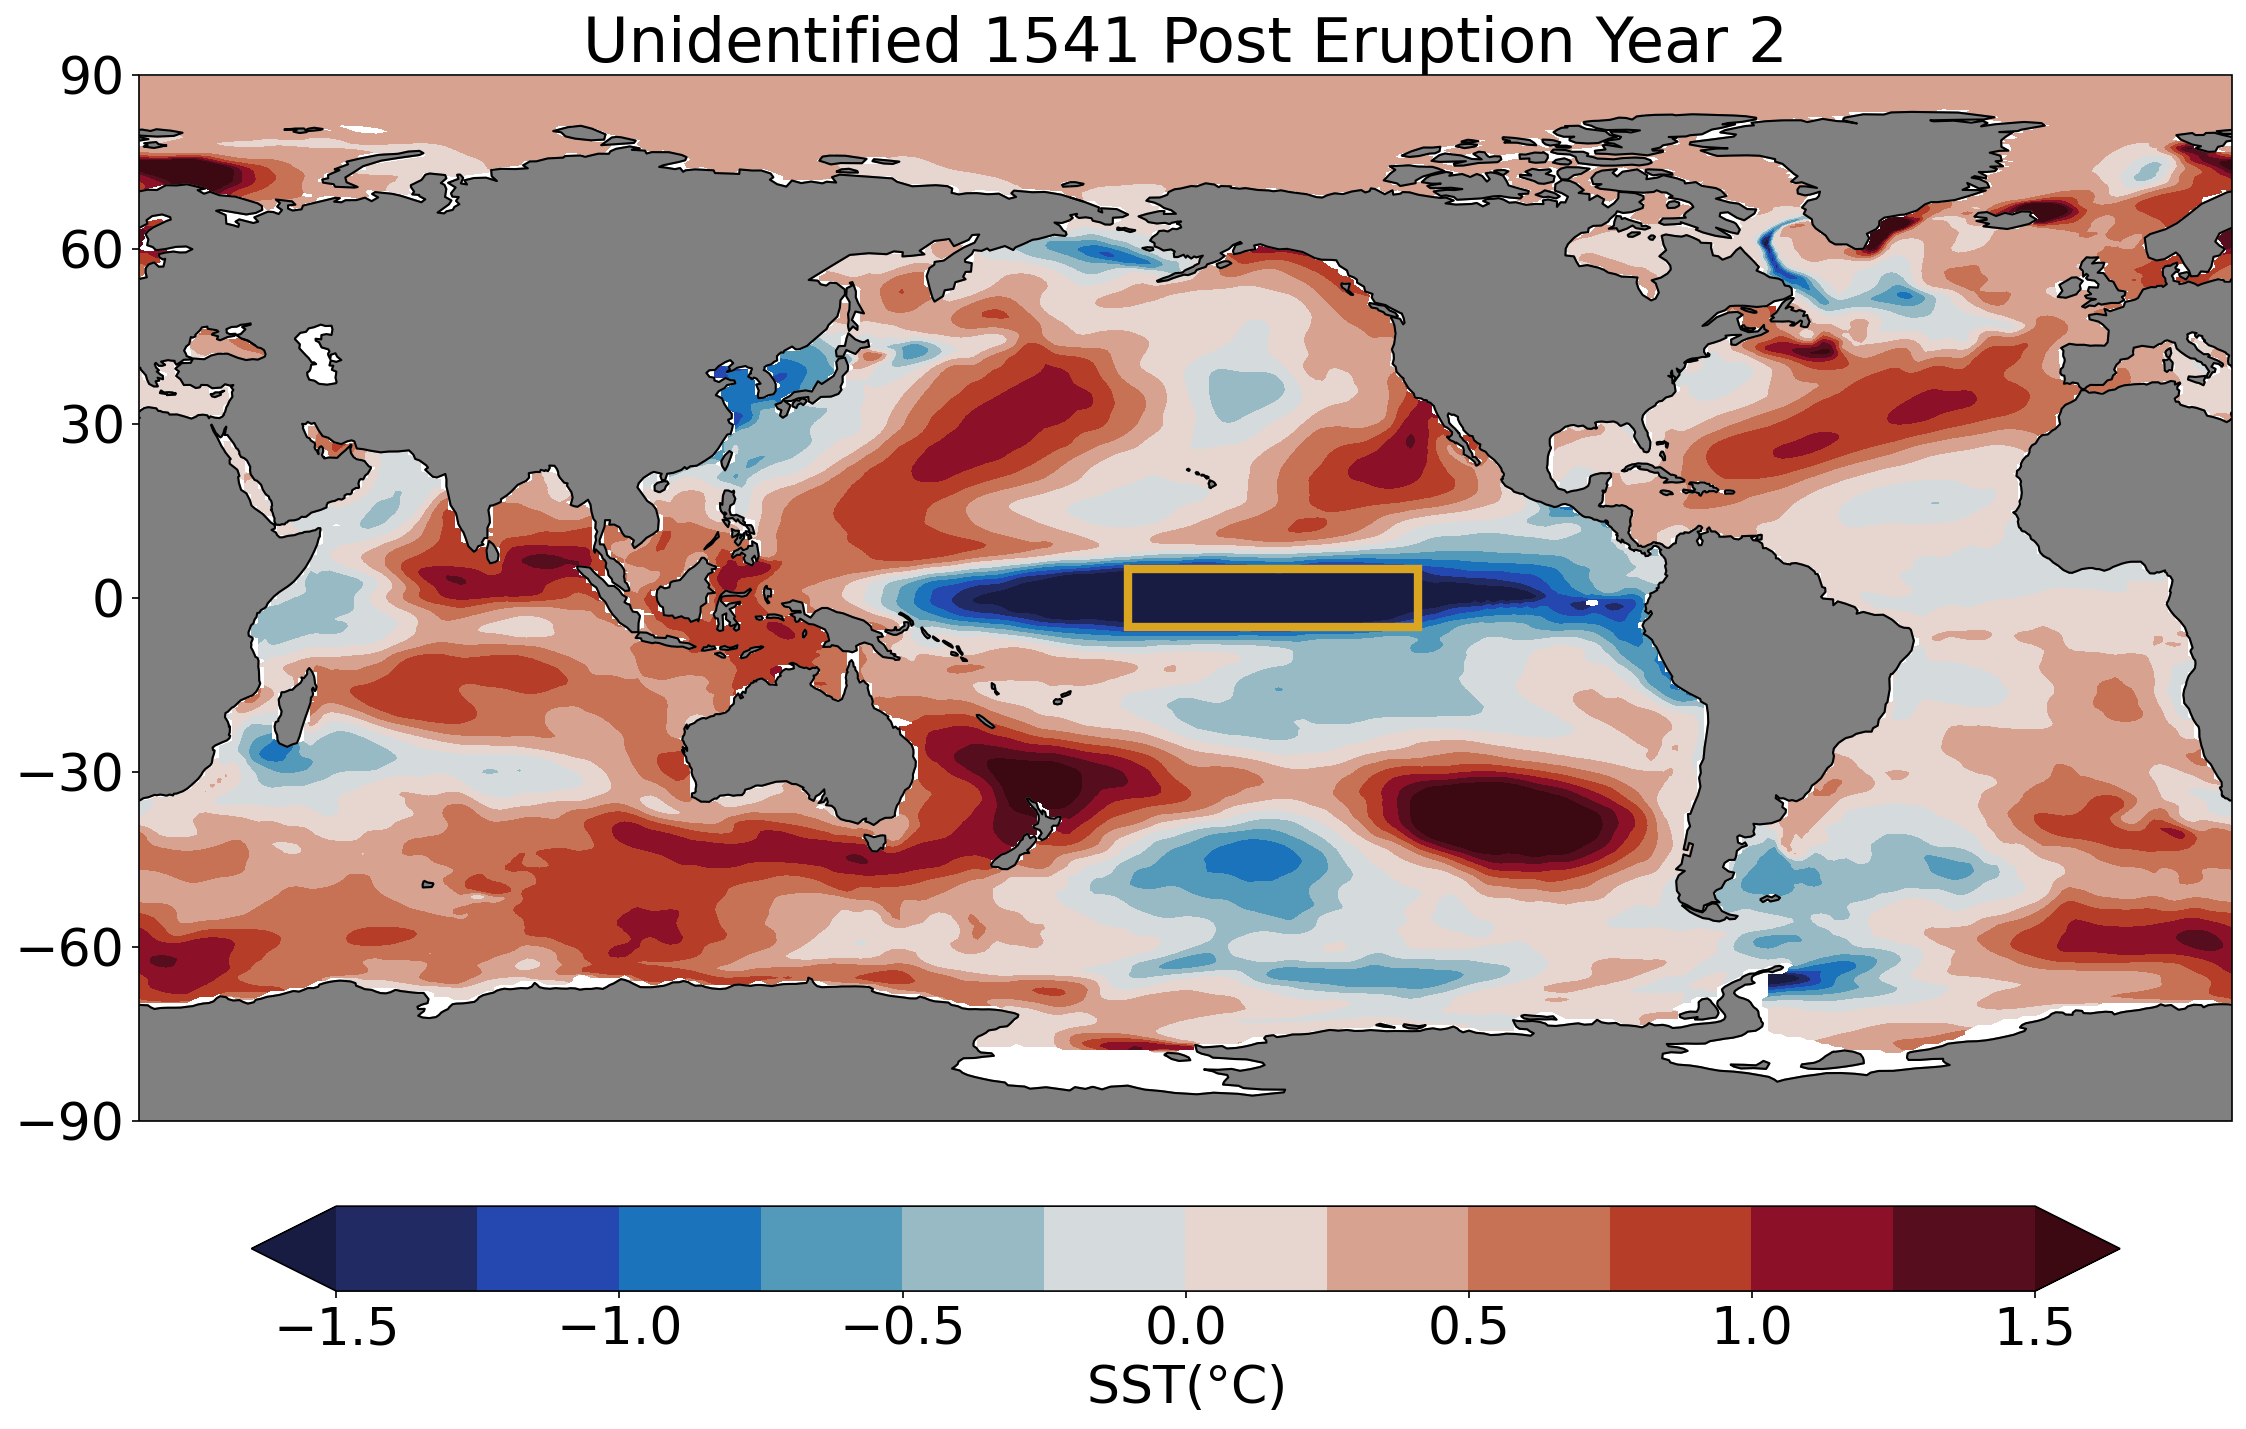

In [109]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-1.5
max_level=1.5
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_unident8,extend='both', levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='goldenrod',
   facecolor='none', linewidth=4))

plt.title('Unidentified 1541 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

#### Unidentified 9 1621

In [110]:
unident9_anomaly = unident9-monthlydata

In [111]:
unident9_rm = rolling_mean(unident9_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [112]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [113]:
unident9_wm = ENSO_area_weighted_mean(unident9_rm,TAREA)
unident9_wm

array([1.26938349, 1.00935042, 1.01540025, 1.2692673 , 1.56361607,
       1.7857349 , 2.03841864, 2.20510597])

In [114]:
TLAT = extract.variables['TLAT'][:]
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [115]:
unident9_rsst = Trop_area_weighted_mean(unident9_rm,TAREA)
unident9_rsst

array([0.33752176, 0.32219716, 0.33434347, 0.36756339, 0.36109029,
       0.32806536, 0.33169079, 0.3241694 ])

In [116]:
unident9_ra = unident9_rm[0] - unident9_rsst[0]

In [117]:
plot_data_unident9,new_lats,new_lons = pop_add_cyclic(unident9_ra,data['TLAT'],data['TLONG']) 

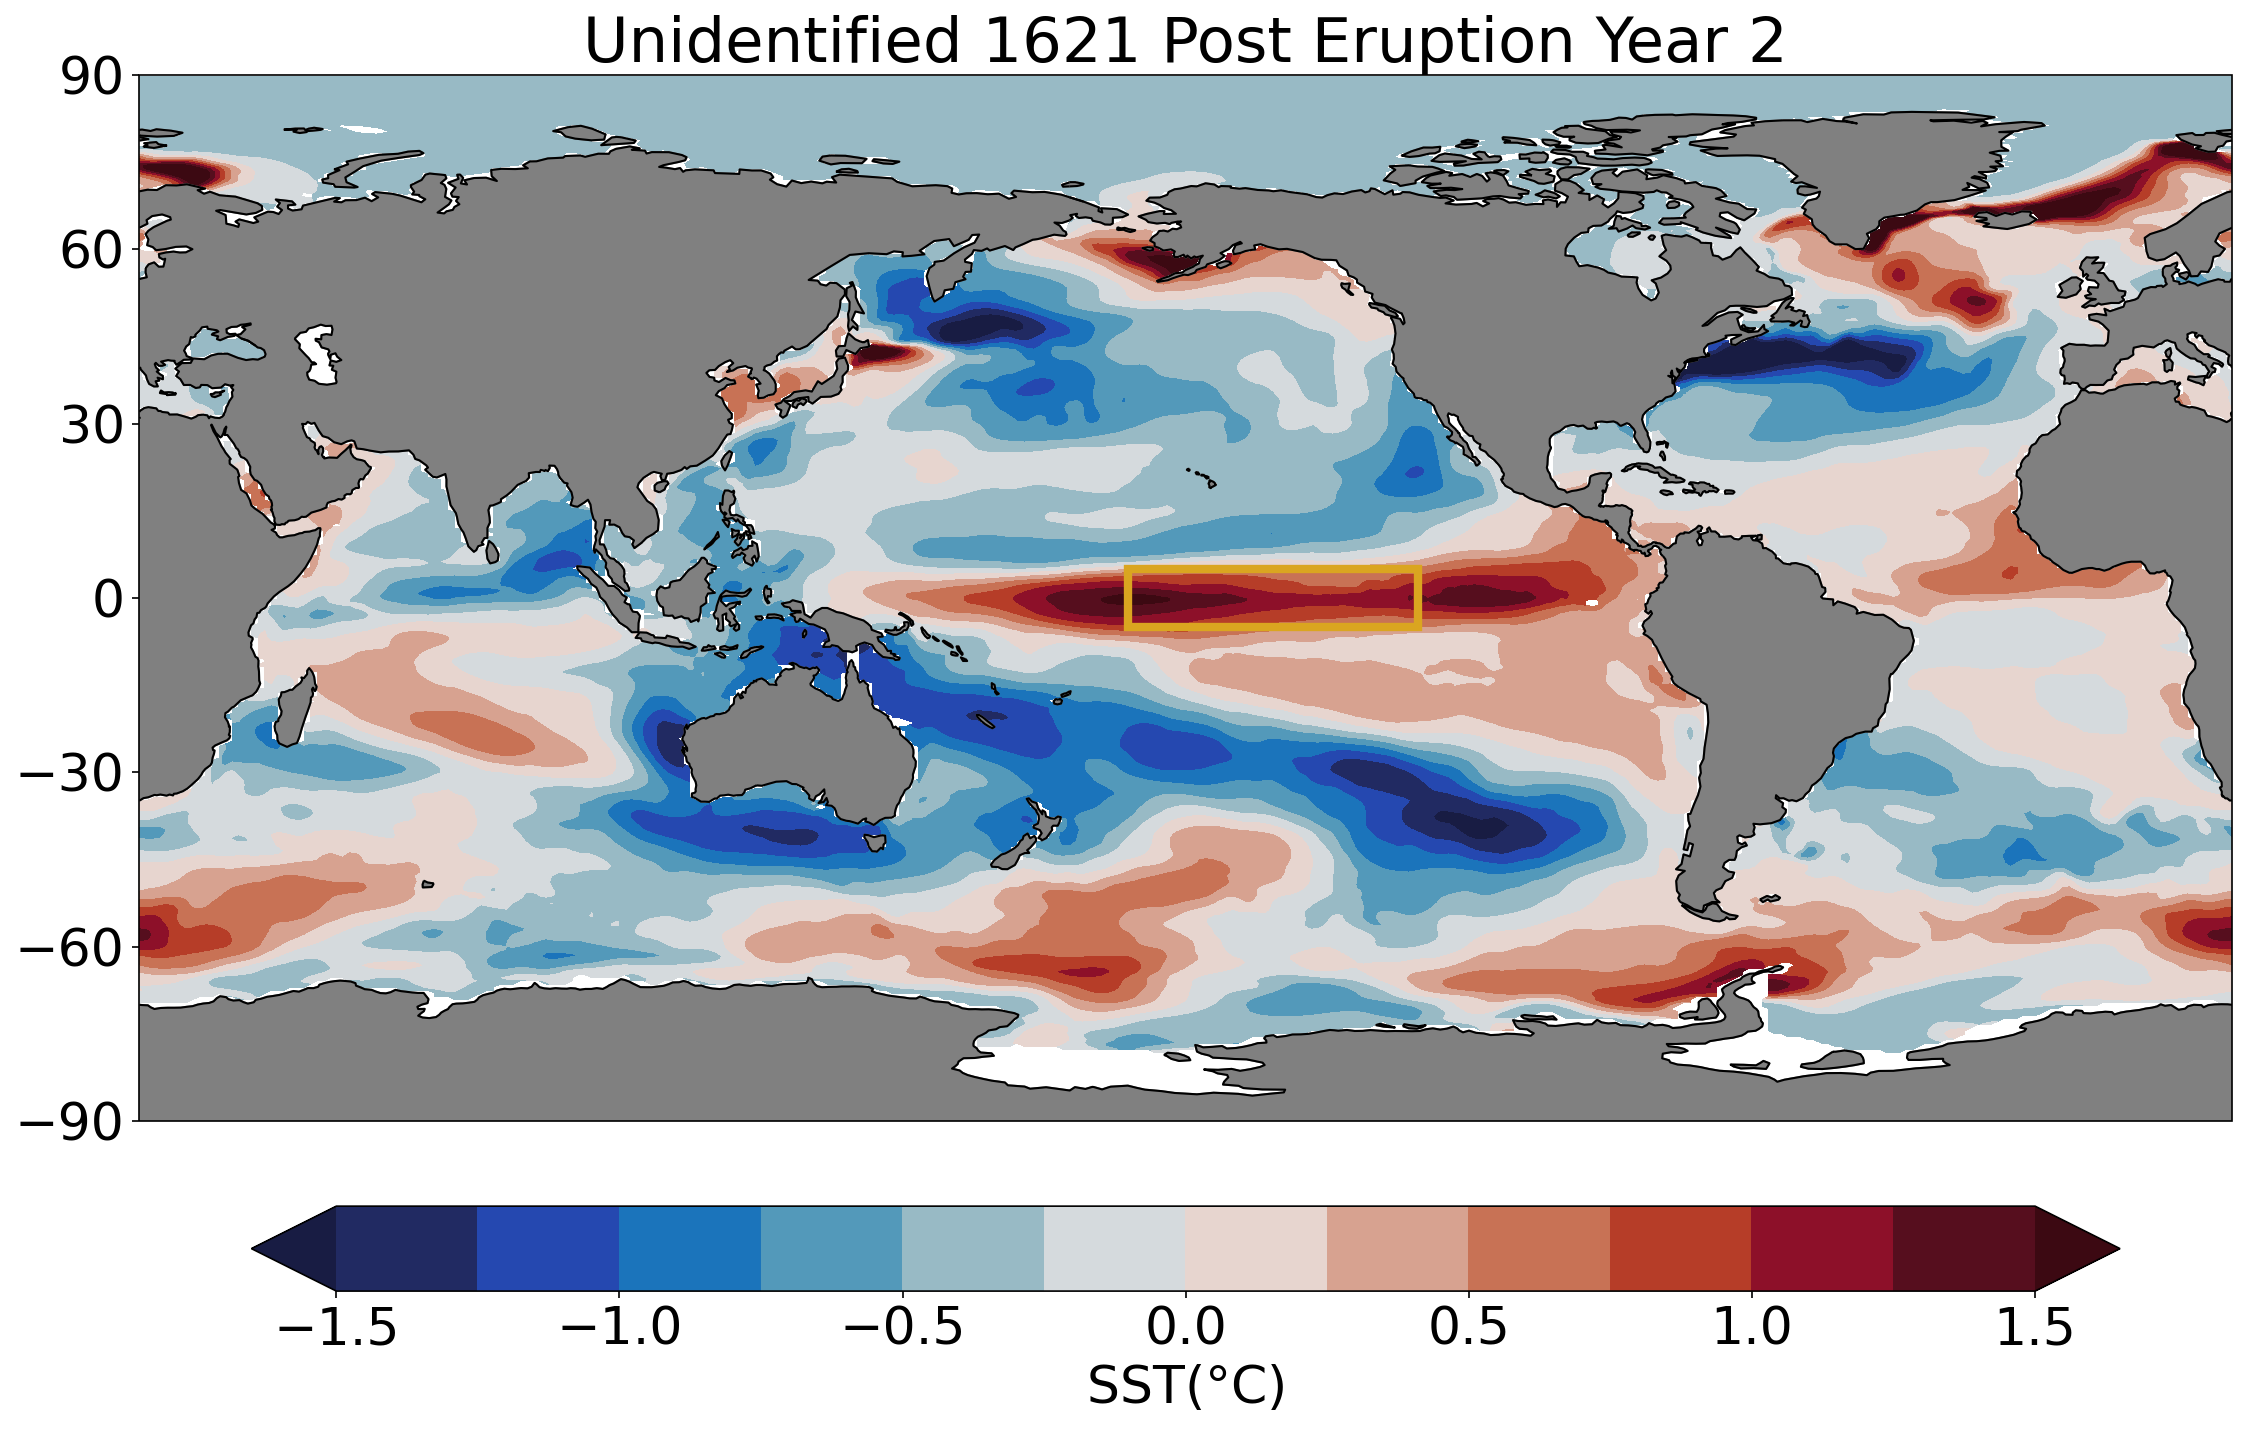

In [119]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-1.5
max_level=1.5
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_unident9,extend='both',levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='goldenrod',
   facecolor='none', linewidth=4))

plt.title('Unidentified 1621 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)

#### Unidentified 10 1662

In [120]:
unident10_anomaly = unident10-monthlydata

In [121]:
unident10_rm = rolling_mean(unident10_anomaly,5,axis=0)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [122]:
extract = nc4.Dataset("/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002.pop.h.TEMP.180001-184912.nc",'r')
TAREA = extract.variables['TAREA'][:]

In [123]:
unident10_wm = ENSO_area_weighted_mean(unident10_rm,TAREA)
unident10_wm

array([-1.01429708, -0.99765119, -0.87324074, -0.49094569, -0.15166513,
       -0.09537481, -0.12757012, -0.18715657])

In [124]:
TLAT = extract.variables['TLAT'][:]
TAREA[TLAT>20] = 0.0
TAREA[TLAT<-20] = 0.0

In [125]:
unident10_rsst = Trop_area_weighted_mean(unident10_rm,TAREA)
unident10_rsst

array([0.09943381, 0.09733817, 0.10856563, 0.15392116, 0.1743102 ,
       0.17687402, 0.17577359, 0.17523402])

In [126]:
unident10_ra = unident10_rm[0] - unident10_rsst[0]

In [127]:
plot_data_unident10,new_lats,new_lons = pop_add_cyclic(unident10_ra,data['TLAT'],data['TLONG'])

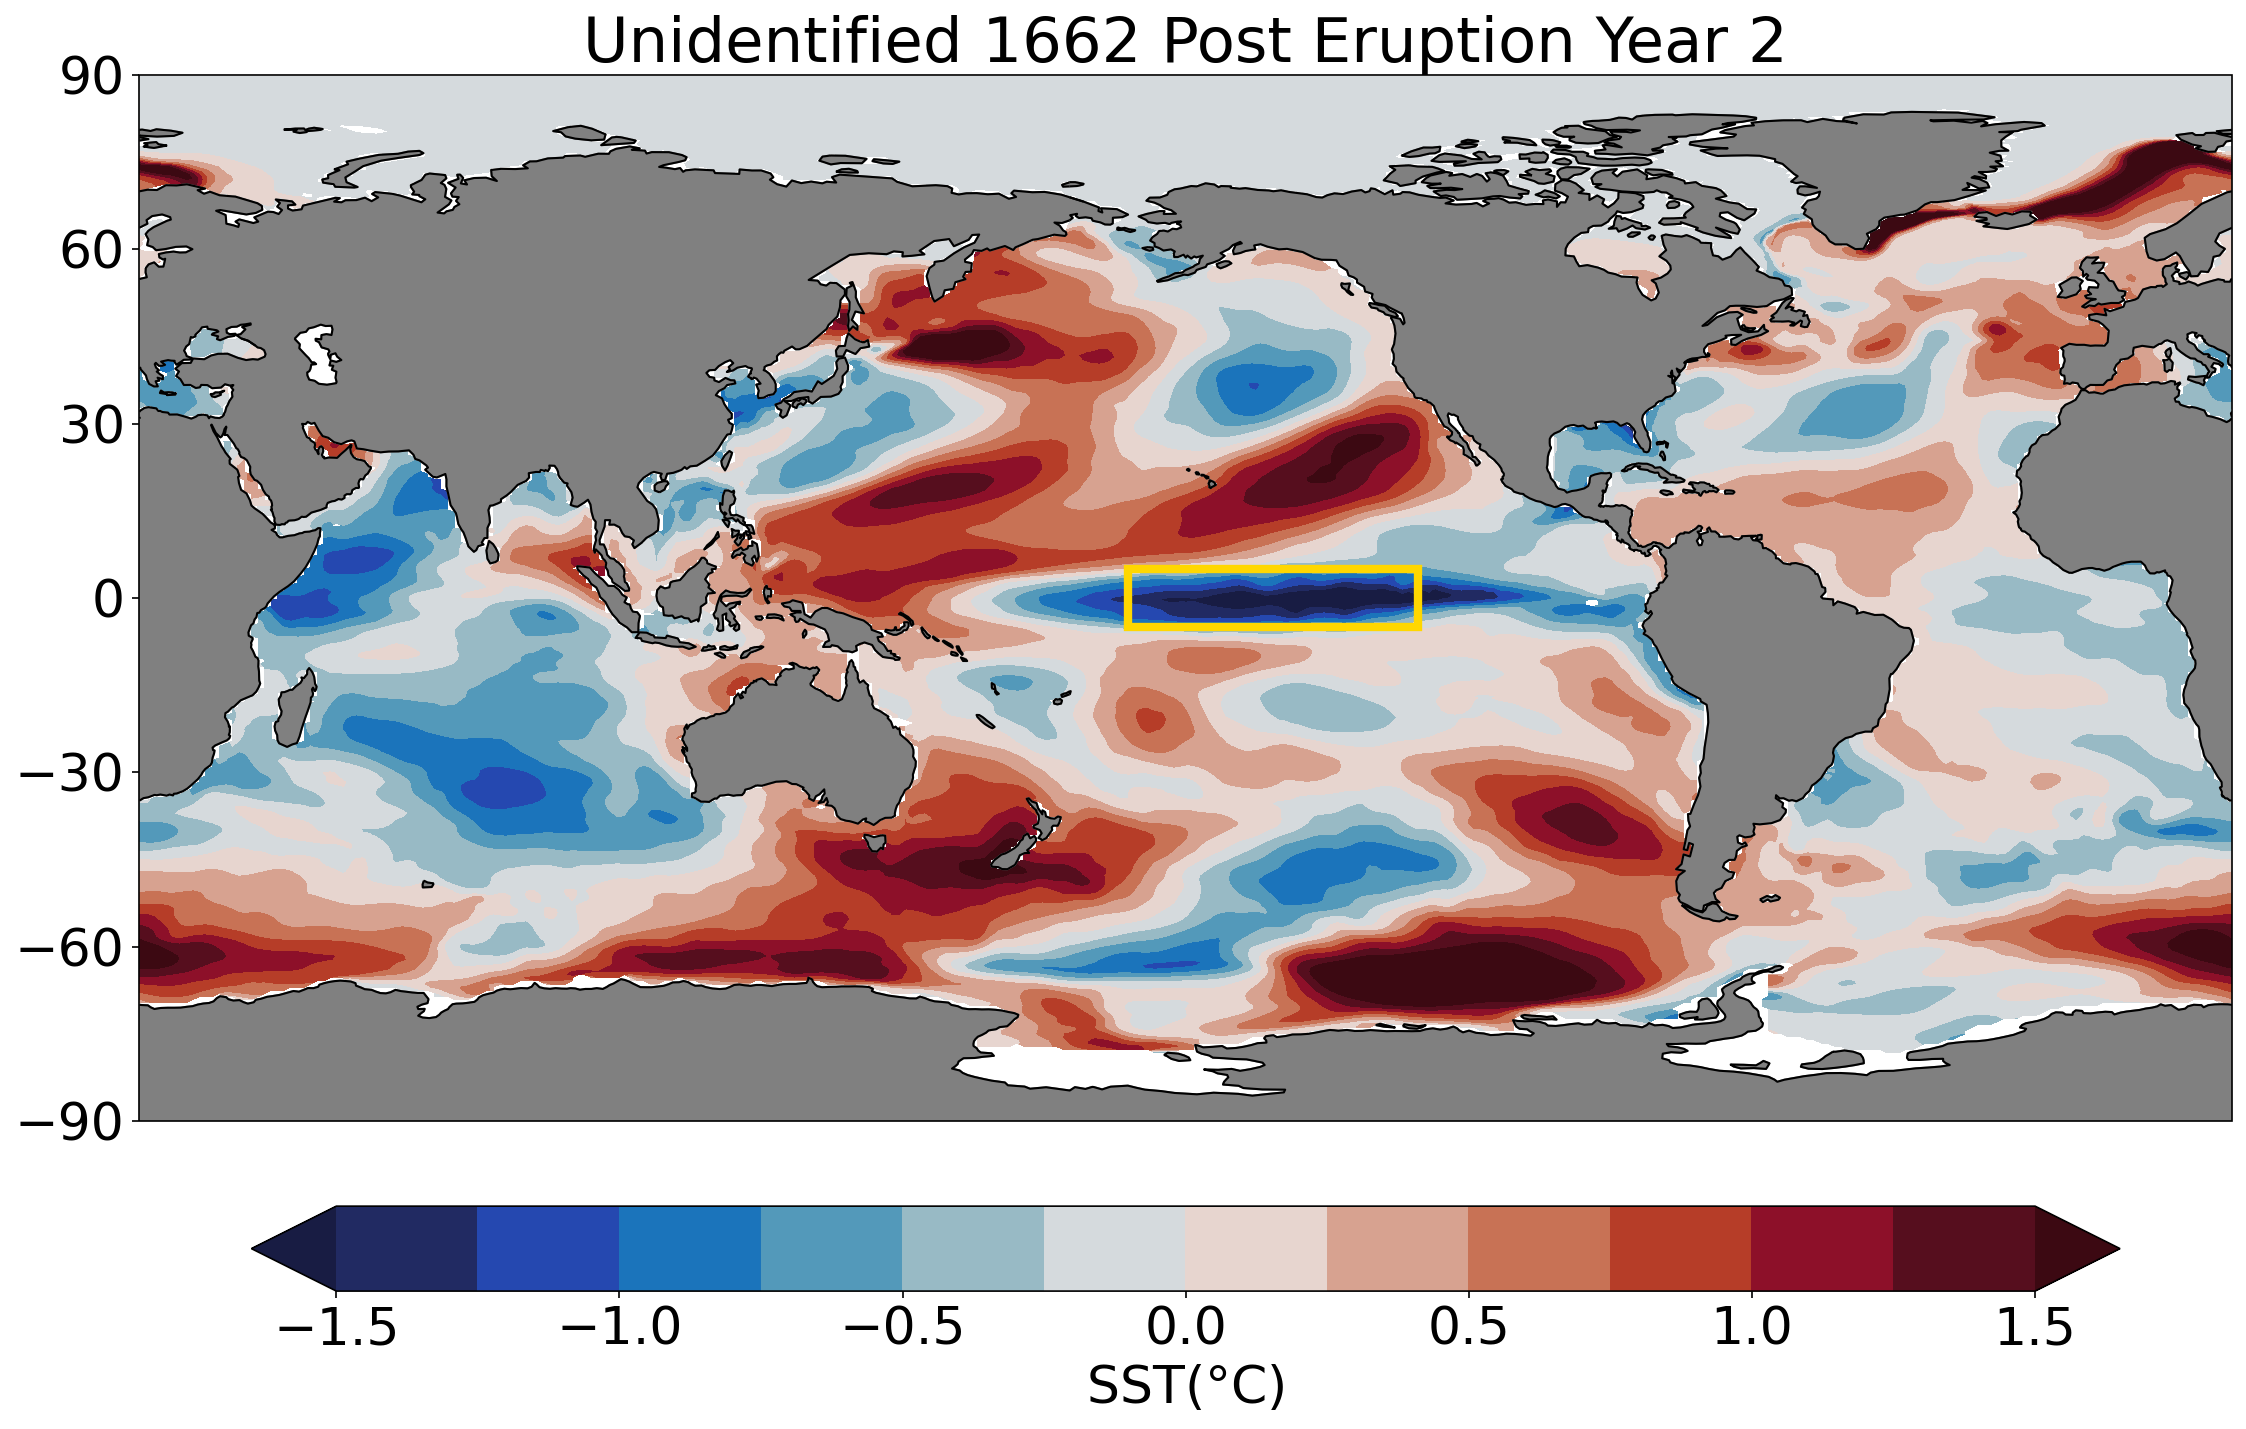

In [129]:
projection=ccrs.PlateCarree(central_longitude = -160)
#projection=ccrs.Robinson(central_longitude=-160, globe=None)
fig,ax= plt.subplots(figsize =(18,15),subplot_kw=dict(projection=projection))

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

min_level=-1.5
max_level=1.5
step_level=0.25

levels = np.arange(min_level, max_level + step_level, step_level)
p = plt.contourf(new_lons,new_lats, plot_data_unident10,extend='both',levels=levels,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.balance,zorder=-1)
plt.yticks([-90, -60, -30, 0, 30, 60, 90], size=25)
#plt.axhline(y=5)
#plt.axhline(y=-5)
#plt.axvline(x=-10)
#plt.axvline(x=40)
        
ax.add_patch(mpatches.Rectangle((-10, 5), 50, -10, edgecolor='gold',
   facecolor='none', linewidth=4))

plt.title('Unidentified 1662 Post Eruption Year 2', size=30)
cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('SST' + "($\degree$C)", size = 25)